# Table of Contents:
* [Analysis Without Descriptions](#descriptionless)
    * [Data Cleaning](#cleaning)
    * [Preprocessing](#preprocessing)
    * [Modelling](#modelling)
        * [Logistic Regression](#logregmodel)
        * [Decision Tree](#dtmodel)
        * [Random Forest](#rfmodel)
        * [Support Vector Machine](#svmmodel)
        * [Neural Network](#nnmodel)
* [Analysis With Descriptions](#descriptions)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers

# Analysis Without Descriptions <a class="anchor" id="descriptionless"></a>

# Data Cleaning <a class="anchor" id="cleaning"></a>

The first step is to get rid of nulls, unnecessary columns, and duplicates, and to change each column to the appropriate data type.

In [4]:
# loading in the non-text data for companies
companies = pd.read_csv('Data/companies.csv',sep=';')

In [5]:
# surveying
companies.head()

Name                       homepage_url  \
0                   #fame                 http://livfame.com   
1                :Qounter             http://www.qounter.com   
2  (THE) ONE of THEM,Inc.                http://oneofthem.jp   
3                 0-6.com                 http://www.0-6.com   
4        004 Technologies  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           2000000   
4                                           Software                 -   

      status country_code state_code                 region           city  \
0  operating          IND         16                 Mumbai         Mumbai   
1  operating          USA         DE             DE - Other  Delaware City   
2  operating          NaN        NaN                    NaN            NaN   
3  operating          CHN         22                Beijing        Beijing   
4  operating          USA         IL  Springfield, Illinois      Champaign   

   funding_rounds  founded_at first_funding_at last_funding_at  \
0               1         NaN       05/01/2015      05/01/2015   
1               2  04/09/2014       01/03/2014      14/10/2014   
2               1         NaN       30/01/2014      30/01/2014   
3               1  01/01/2007       19/03/2008      19/03/2008   
4               1  01/01/2010       24/07/2014      24/07/2014   

                             permalink  
0                  /organization/-fame  
1               /organization/-qounter  
2  /organization/-the-one-of-them-inc-  
3                /organization/0-6-com  
4       /organization/004-technologies

In [6]:
kaggle = companies.copy()

In [7]:
kaggle.drop(columns=['permalink', 'first_funding_at', 'last_funding_at', 'region', 'state_code'], inplace=True)

In [8]:
kaggle.head()

Name                       homepage_url  \
0                   #fame                 http://livfame.com   
1                :Qounter             http://www.qounter.com   
2  (THE) ONE of THEM,Inc.                http://oneofthem.jp   
3                 0-6.com                 http://www.0-6.com   
4        004 Technologies  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           2000000   
4                                           Software                 -   

      status country_code           city  funding_rounds  founded_at  
0  operating          IND         Mumbai               1         NaN  
1  operating          USA  Delaware City               2  04/09/2014  
2  operating          NaN            NaN               1         NaN  
3  operating          CHN        Beijing               1  01/01/2007  
4  operating          USA      Champaign               1  01/01/2010

In [43]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               63214 non-null  object
 1   homepage_url       59069 non-null  object
 2   category_list      63215 non-null  object
 3   funding_total_usd  63215 non-null  object
 4   status             63215 non-null  object
 5   country_code       57799 non-null  object
 6   state_code         56263 non-null  object
 7   region             56760 non-null  object
 8   city               56762 non-null  object
 9   funding_rounds     63215 non-null  int64 
 10  founded_at         49707 non-null  object
 11  first_funding_at   63192 non-null  object
 12  last_funding_at    63215 non-null  object
 13  permalink          63215 non-null  object
dtypes: int64(1), object(13)
memory usage: 6.8+ MB


In [44]:
companies.isna().sum()

Name                     1
homepage_url          4146
category_list            0
funding_total_usd        0
status                   0
country_code          5416
state_code            6952
region                6455
city                  6453
funding_rounds           0
founded_at           13508
first_funding_at        23
last_funding_at          0
permalink                0
dtype: int64

In [45]:
# drop the one row with a missing name
companies.dropna(subset='Name', inplace=True)

In [46]:
# dropping unnecessary columns
companies.drop(columns=['homepage_url', 'state_code', 'region', 'permalink'], inplace=True)

In [47]:
# dropping the rows where any of the location columns are null
companies.dropna(subset=['country_code', 'city'], inplace=True)

In [48]:
companies.head()

Name                                      category_list  \
0               #fame                                              Media   
1            :Qounter  Application Platforms|Real Time|Social Network...   
3             0-6.com                                        Curated Web   
4    004 Technologies                                           Software   
5  01Games Technology                                              Games   

  funding_total_usd     status country_code           city  funding_rounds  \
0          10000000  operating          IND         Mumbai               1   
1            700000  operating          USA  Delaware City               2   
3           2000000  operating          CHN        Beijing               1   
4                 -  operating          USA      Champaign               1   
5             41250  operating          HKG      Hong Kong               1   

   founded_at first_funding_at last_funding_at  
0         NaN       05/01/2015      05/01/2015  
1  04/09/2014       01/03/2014      14/10/2014  
3  01/01/2007       19/03/2008      19/03/2008  
4  01/01/2010       24/07/2014      24/07/2014  
5         NaN       01/07/2014      01/07/2014

In [49]:
# resetting the index 
companies.reset_index(drop=True, inplace=True)

In [50]:
companies.isna().sum()

Name                     0
category_list            0
funding_total_usd        0
status                   0
country_code             0
city                     0
funding_rounds           0
founded_at           10856
first_funding_at        22
last_funding_at          0
dtype: int64

##### Now the only null values left are with the 'founded_at' and 'first_funding_at' columns. I want to impute missing values for 'founded_at' from 'first_funding_at', and for 'first_funding_at' from 'last_funding_at'. Before doing that I will need to convert these date columns to datetime types since they are currently object types.

##### *Some of the code below is commented out because it returned errors and I wanted to be able to run all cells in the notebook automatically, but I left it there for reference.

In [51]:
#companies['founded_at'] = pd.to_datetime(companies['founded_at'])

In [52]:
# trying again, but with the format argument set to 'mixed'
#companies['founded_at'] = pd.to_datetime(companies['founded_at'], format='mixed')

In [53]:
# the error says there is a timestamp out of bounds, which company is this?
companies[companies['founded_at'] == '1636-09-08']

Name                    category_list funding_total_usd  \
21347  Harvard University  Colleges|Education|Universities          90000000   

          status country_code       city  funding_rounds  founded_at  \
21347  operating          USA  Cambridge               1  1636-09-08   

      first_funding_at last_funding_at  
21347       06/01/2014      06/01/2014

In [54]:
# remove this row (since Harvard isn't exactly a startup anyway), and then retry converting to datetime
companies.drop(companies[companies['founded_at'] == '1636-09-08'].index, inplace=True)

In [55]:
companies.reset_index(drop=True, inplace=True)

In [56]:
companies[companies['founded_at'] == '1636-09-08'] #it's gone

Empty DataFrame
Columns: [Name, category_list, funding_total_usd, status, country_code, city, funding_rounds, founded_at, first_funding_at, last_funding_at]
Index: []

In [57]:
# trying to convert to datetime again
companies['founded_at'] = pd.to_datetime(companies['founded_at'], format='mixed')

In [58]:
companies.info() # the type is changed now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               56760 non-null  object        
 1   category_list      56760 non-null  object        
 2   funding_total_usd  56760 non-null  object        
 3   status             56760 non-null  object        
 4   country_code       56760 non-null  object        
 5   city               56760 non-null  object        
 6   funding_rounds     56760 non-null  int64         
 7   founded_at         45904 non-null  datetime64[ns]
 8   first_funding_at   56738 non-null  object        
 9   last_funding_at    56760 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 4.3+ MB


In [59]:
companies.head() # nan changed to NaT

Name                                      category_list  \
0               #fame                                              Media   
1            :Qounter  Application Platforms|Real Time|Social Network...   
2             0-6.com                                        Curated Web   
3    004 Technologies                                           Software   
4  01Games Technology                                              Games   

  funding_total_usd     status country_code           city  funding_rounds  \
0          10000000  operating          IND         Mumbai               1   
1            700000  operating          USA  Delaware City               2   
2           2000000  operating          CHN        Beijing               1   
3                 -  operating          USA      Champaign               1   
4             41250  operating          HKG      Hong Kong               1   

  founded_at first_funding_at last_funding_at  
0        NaT       05/01/2015      05/01/2015  
1 2014-04-09       01/03/2014      14/10/2014  
2 2007-01-01       19/03/2008      19/03/2008  
3 2010-01-01       24/07/2014      24/07/2014  
4        NaT       01/07/2014      01/07/2014

In [60]:
# converting first_funding_at
#companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [61]:
# another out of bounds timestamp, which one is this?
companies[companies['first_funding_at'] == '1532-06-26']

Name                                      category_list  \
6403  Blaze Bioscience  Biotechnology|Health Care|Health Care Informat...   

     funding_total_usd     status country_code     city  funding_rounds  \
6403          32936998  operating          USA  Seattle               5   

     founded_at first_funding_at last_funding_at  
6403 2010-01-01       1532-06-26      03/12/2013

In [62]:
# this is clearly an erroneous date, but I don't want to drop the row. I'll change this value to nan
companies.at[6403, 'first_funding_at'] = np.nan

In [63]:
companies.loc[6403] # it's been changed

Name                                                  Blaze Bioscience
category_list        Biotechnology|Health Care|Health Care Informat...
funding_total_usd                                             32936998
status                                                       operating
country_code                                                       USA
city                                                           Seattle
funding_rounds                                                       5
founded_at                                         2010-01-01 00:00:00
first_funding_at                                                   NaN
last_funding_at                                             03/12/2013
Name: 6403, dtype: object

In [64]:
# try again
#companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [65]:
# another out of bounds timestamp
companies[companies['first_funding_at'] == '1201-11-23']

Name                                      category_list  \
19114  Gamewheel  Brand Marketing|Game|Mobile Advertising|Social...   

      funding_total_usd     status country_code    city  funding_rounds  \
19114                 -  operating          DEU  Berlin               2   

      founded_at first_funding_at last_funding_at  
19114        NaT       1201-11-23      03/12/2014

In [66]:
# this also seems like a mistake, change it to nan as well
companies.at[19114, 'first_funding_at'] = np.nan

In [67]:
companies.loc[19114]

Name                                                         Gamewheel
category_list        Brand Marketing|Game|Mobile Advertising|Social...
funding_total_usd                                                    -
status                                                       operating
country_code                                                       DEU
city                                                            Berlin
funding_rounds                                                       2
founded_at                                                         NaT
first_funding_at                                                   NaN
last_funding_at                                             03/12/2014
Name: 19114, dtype: object

In [68]:
# and again
#companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [69]:
# another out of bounds timestamp
companies[companies['first_funding_at'] == '1014-03-01']

Name  category_list funding_total_usd     status country_code  \
31824  Mousera  Biotechnology          29940004  operating          USA   

            city  funding_rounds founded_at first_funding_at last_funding_at  
31824  San Mateo               3 2013-01-01       1014-03-01      09/06/2015

In [70]:
# change this to nan as well
companies.at[31824, 'first_funding_at'] = np.nan

In [71]:
companies.loc[31824]

Name                             Mousera
category_list              Biotechnology
funding_total_usd               29940004
status                         operating
country_code                         USA
city                           San Mateo
funding_rounds                         3
founded_at           2013-01-01 00:00:00
first_funding_at                     NaN
last_funding_at               09/06/2015
Name: 31824, dtype: object

In [72]:
# and again
companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [73]:
companies.info() # type is now datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               56760 non-null  object        
 1   category_list      56760 non-null  object        
 2   funding_total_usd  56760 non-null  object        
 3   status             56760 non-null  object        
 4   country_code       56760 non-null  object        
 5   city               56760 non-null  object        
 6   funding_rounds     56760 non-null  int64         
 7   founded_at         45904 non-null  datetime64[ns]
 8   first_funding_at   56735 non-null  datetime64[ns]
 9   last_funding_at    56760 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 4.3+ MB


In [74]:
# converting last_funding_at now
companies['last_funding_at'] = pd.to_datetime(companies['last_funding_at'], format='mixed')

In [75]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               56760 non-null  object        
 1   category_list      56760 non-null  object        
 2   funding_total_usd  56760 non-null  object        
 3   status             56760 non-null  object        
 4   country_code       56760 non-null  object        
 5   city               56760 non-null  object        
 6   funding_rounds     56760 non-null  int64         
 7   founded_at         45904 non-null  datetime64[ns]
 8   first_funding_at   56735 non-null  datetime64[ns]
 9   last_funding_at    56760 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 4.3+ MB


##### Now that all date columns are datetime types, I can impute 'first_funding_at' from 'last_funding_at' then 'founded_at' from 'first_funding_at'. I need to find the average difference in time between each set of the two columns and then use that to impute values.

In [76]:
companies.head()

Name                                      category_list  \
0               #fame                                              Media   
1            :Qounter  Application Platforms|Real Time|Social Network...   
2             0-6.com                                        Curated Web   
3    004 Technologies                                           Software   
4  01Games Technology                                              Games   

  funding_total_usd     status country_code           city  funding_rounds  \
0          10000000  operating          IND         Mumbai               1   
1            700000  operating          USA  Delaware City               2   
2           2000000  operating          CHN        Beijing               1   
3                 -  operating          USA      Champaign               1   
4             41250  operating          HKG      Hong Kong               1   

  founded_at first_funding_at last_funding_at  
0        NaT       2015-05-01      2015-05-01  
1 2014-04-09       2014-01-03      2014-10-14  
2 2007-01-01       2008-03-19      2008-03-19  
3 2010-01-01       2014-07-24      2014-07-24  
4        NaT       2014-01-07      2014-01-07

In [77]:
# testing on index 0
companies['last_funding_at'][0] - companies['first_funding_at'][0] # returns Timedelta type

Timedelta('0 days 00:00:00')

In [78]:
# that works - now get the average timedelta between these columns
(companies['last_funding_at'] - companies['first_funding_at']).mean() 

Timedelta('387 days 17:03:12.960253816')

In [79]:
# saving to a variable
funding_timedelta = (companies['last_funding_at'] - companies['first_funding_at']).mean()

##### I also want to get the average timedelta between 'first_funding_at' and 'founded_at' before imputing values for 'first_funding_at' so that it's as accurate as possible.

In [80]:
(companies['first_funding_at'] - companies['founded_at']).mean()

Timedelta('1383 days 17:23:42.723012880')

In [81]:
founding_timedelta = (companies['first_funding_at'] - companies['founded_at']).mean()

In [82]:
# testing that this would work 
type(companies['founded_at'][0])
type(companies['founded_at'][0]) == pd._libs.tslibs.nattype.NaTType

True

In [83]:
# now impute values for 'first_funding_at' from 'last_funding_at'
for i in range(len(companies['first_funding_at'])):
    if type(companies.at[i, 'first_funding_at']) == pd._libs.tslibs.nattype.NaTType:
        companies.at[i, 'first_funding_at'] = companies.at[i, 'last_funding_at'] - funding_timedelta

In [84]:
# checking that 'first_funding_at' nulls are gone
companies.isna().sum()

Name                     0
category_list            0
funding_total_usd        0
status                   0
country_code             0
city                     0
funding_rounds           0
founded_at           10856
first_funding_at         0
last_funding_at          0
dtype: int64

In [85]:
# imputing the values for 'founded_at'
for i in range(len(companies['founded_at'])):
    if type(companies.at[i, 'founded_at']) == pd._libs.tslibs.nattype.NaTType:
        companies.at[i, 'founded_at'] = companies.at[i, 'first_funding_at'] - founding_timedelta

In [86]:
# all nulls are gone
companies.isna().sum()

Name                 0
category_list        0
funding_total_usd    0
status               0
country_code         0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [87]:
# check for duplicates
companies.duplicated().sum()

0

In [88]:
# drop the duplicates
companies.drop_duplicates(inplace=True)

In [89]:
companies.duplicated().sum()

0

I've dealt with all null values but I can see that there's a row with a '-' value in the 'funding_total_usd' column and that the column is of type object not int or float. I need to remove the rows where this is the case because this column will form part of my y column in modelling, and then I need to change the type to int or float.

In [90]:
# first get the indeces for the rows I want to drop
dash_index = companies[companies['funding_total_usd'] == '-'].index

In [91]:
companies.drop(labels=dash_index, inplace=True)

In [92]:
companies.head()

Name                                      category_list  \
0                   #fame                                              Media   
1                :Qounter  Application Platforms|Real Time|Social Network...   
2                 0-6.com                                        Curated Web   
4      01Games Technology                                              Games   
5  Ondine Biomedical Inc.                                      Biotechnology   

  funding_total_usd     status country_code           city  funding_rounds  \
0          10000000  operating          IND         Mumbai               1   
1            700000  operating          USA  Delaware City               2   
2           2000000  operating          CHN        Beijing               1   
4             41250  operating          HKG      Hong Kong               1   
5            762851  operating          CAN      Vancouver               2   

                     founded_at first_funding_at last_funding_at  
0 2011-07-17 06:36:17.276987120       2015-05-01      2015-05-01  
1 2014-04-09 00:00:00.000000000       2014-01-03      2014-10-14  
2 2007-01-01 00:00:00.000000000       2008-03-19      2008-03-19  
4 2010-03-25 06:36:17.276987120       2014-01-07      2014-01-07  
5 1997-01-01 00:00:00.000000000       2009-11-09      2009-12-21

In [93]:
# reset index again
companies.reset_index(drop=True, inplace=True)

In [94]:
# change the type of the column now
companies['funding_total_usd'] = companies['funding_total_usd'].astype(float)

In [95]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47583 entries, 0 to 47582
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               47583 non-null  object        
 1   category_list      47583 non-null  object        
 2   funding_total_usd  47583 non-null  float64       
 3   status             47583 non-null  object        
 4   country_code       47583 non-null  object        
 5   city               47583 non-null  object        
 6   funding_rounds     47583 non-null  int64         
 7   founded_at         47583 non-null  datetime64[ns]
 8   first_funding_at   47583 non-null  datetime64[ns]
 9   last_funding_at    47583 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 3.6+ MB


In [96]:
# moving on to the category_list column and cleaning that up
companies['category_list'].value_counts()

category_list
Software                                                                                     3327
Biotechnology                                                                                3297
E-Commerce                                                                                    948
Clean Technology                                                                              905
Mobile                                                                                        901
                                                                                             ... 
Hospitality|Sustainability|Travel & Tourism                                                     1
Content Creators|Curated Web|Fashion|Lifestyle|Media|Social Network Media|Video Streaming       1
E-Commerce|Fashion|Retail Technology|Soccer                                                     1
Advertising|Design|Search|Semantic Search|SEO|Social Media Marketing|Web Development            1
Consum

##### The last column to clean is 'category_list' which is currently a string of industry categories all lumped together. I want to be able to see each category in a row individually, so I will create a new row that is a list of individual strings.

In [97]:
companies['categories'] = companies['category_list'].apply(lambda x: x.split('|'))

In [98]:
# dropping the category_list column since I've replaced it
companies.drop(columns='category_list', inplace=True)

In [99]:
companies.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  
0                                            [Media]  
1  [Application Platforms, Real Time, Social Netw...  
2                                      [Curated Web]  
3                                            [Games]  
4                                    [Biotechnology]

# Preprocessing <a class="anchor" id="preprocessing"></a>

Now that the data has been cleaned I need to get it ready for modelling. I'll continue with the categories column to start. I want to create dummy columns for some number of the top categories.

In [100]:
companies.explode('categories') # I can use this to get the count of unique categories

Name  funding_total_usd     status country_code  \
0                      #fame         10000000.0  operating          IND   
1                   :Qounter           700000.0  operating          USA   
1                   :Qounter           700000.0  operating          USA   
1                   :Qounter           700000.0  operating          USA   
2                    0-6.com          2000000.0  operating          CHN   
...                      ...                ...        ...          ...   
47581  Zzzzapp Wireless ltd.           114304.0  operating          HRV   
47581  Zzzzapp Wireless ltd.           114304.0  operating          HRV   
47582                  Ôasys            18192.0  operating          USA   
47582                  Ôasys            18192.0  operating          USA   
47582                  Ôasys            18192.0  operating          USA   

                city  funding_rounds                    founded_at  \
0             Mumbai               1 2011-07-17 06:36:17.276987120   
1      Delaware City               2 2014-04-09 00:00:00.000000000   
1      Delaware City               2 2014-04-09 00:00:00.000000000   
1      Delaware City               2 2014-04-09 00:00:00.000000000   
2            Beijing               1 2007-01-01 00:00:00.000000000   
...              ...             ...                           ...   
47581          Split               4 2012-05-13 00:00:00.000000000   
47581          Split               4 2012-05-13 00:00:00.000000000   
47582  San Francisco               1 2014-01-01 00:00:00.000000000   
47582  San Francisco               1 2014-01-01 00:00:00.000000000   
47582  San Francisco               1 2014-01-01 00:00:00.000000000   

      first_funding_at last_funding_at             categories  
0           2015-05-01      2015-05-01                  Media  
1           2014-01-03      2014-10-14  Application Platforms  
1           2014-01-03      2014-10-14              Real Time  
1           2014-01-03      2014-10-14   Social Network Media  
2           2008-03-19      2008-03-19            Curated Web  
...                ...             ...                    ...  
47581       2011-01-11      2014-01-03        Web Development  
47581       2011-01-11      2014-01-03               Wireless  
47582       2015-01-01      2015-01-01   Consumer Electronics  
47582       2015-01-01      2015-01-01     Internet of Things  
47582       2015-01-01      2015-01-01     Telecommunications  

[115997 rows x 10 columns]

In [101]:
companies.explode('categories')['categories'].value_counts()

categories
Software               7013
Mobile                 4331
Biotechnology          4123
E-Commerce             3084
Curated Web            2272
                       ... 
Made in Italy             1
Private Corrections       1
Hi Tech                   1
Hip Hop                   1
Micro-Enterprises         1
Name: count, Length: 850, dtype: int64

In [102]:
# What percentage of the data do 50 categories cover?
companies.explode('categories')['categories'].value_counts(normalize = True)[:50].sum()

0.5588247971930307

##### 55% seems good enough for now, I'll dummy those 50 categories and lump the rest under 'Other'.

In [103]:
# getting a list of these top 50 categories
list(companies.explode('categories')['categories'].value_counts()[:50].index)

['Software',
 'Mobile',
 'Biotechnology',
 'E-Commerce',
 'Curated Web',
 'Enterprise Software',
 'Social Media',
 'Health Care',
 'Advertising',
 'SaaS',
 'Games',
 'Health and Wellness',
 'Analytics',
 'Education',
 'Internet',
 'Finance',
 'Technology',
 'Hardware + Software',
 'Apps',
 'Clean Technology',
 'Manufacturing',
 'Services',
 'Security',
 'Marketplaces',
 'Video',
 'Medical',
 'Big Data',
 'Cloud Computing',
 'Fashion',
 'Travel',
 'Search',
 'Information Technology',
 'Networking',
 'Sales and Marketing',
 'Social Network Media',
 'Music',
 'Semiconductors',
 'Real Estate',
 'Consulting',
 'Entertainment',
 'FinTech',
 'Media',
 'Startups',
 'News',
 'Web Hosting',
 'Retail',
 'Financial Services',
 'Hospitality',
 'Messaging',
 'Sports']

In [104]:
# creating a copy of the companies dataframe
df = companies.copy()

In [105]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  
0                                            [Media]  
1  [Application Platforms, Real Time, Social Netw...  
2                                      [Curated Web]  
3                                            [Games]  
4                                    [Biotechnology]

In [106]:
# creating the dummy columns and populating them based on the categories column - 
# the Other column gets populated for any row that does not already had a top category column checked off
top_categories = list(df.explode('categories')['categories'].value_counts()[:50].index)
top_categories.sort()
for category in top_categories:
    df[category] = df.apply(lambda row: 1 if category in row['categories'] else 0, axis=1)
df['Other'] = df.apply(lambda row: 1 if len(np.setdiff1d(row['categories'], top_categories)) == len(row['categories']) else 0, axis=1)

In [107]:
pd.set_option('display.max_columns', 500)

In [108]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  Advertising  Analytics  \
0                                            [Media]            0          0   
1  [Application Platforms, Real Time, Social Netw...            0          0   
2                                      [Curated Web]            0          0   
3                                            [Games]            0          0   
4                                    [Biotechnology]            0          0   

   Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
0     0         0              0                 0                0   
1     0         0              0                 0                0   
2     0         0              0                 0                0   
3     0         0              0                 0                0   
4     0         0              1                 0                0   

   Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
0           0            0           0          0                    0   
1           0            0           0          0                    0   
2           0            1           0          0                    0   
3           0            0           0          0                    0   
4           0            0           0          0                    0   

   Entertainment  Fashion  FinTech  Finance  Financial Services  Games  \
0              0        0        0        0                   0      0   
1              0        0        0        0                   0      0   
2              0        0        0        0                   0      0   
3              0        0        0        0                   0      1   
4              0        0        0        0                   0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0                    0            0                    0            0   
1                    0            0                    0            0   
2                    0            0                    0            0   
3                    0            0                    0            0   
4                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
0                       0         0              0             0      1   
1                       0         0              0             0      0   
2                       0         0              0             0      0   
3                       0         0              0             0      0   
4                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
0        0          0       0      0           0     0            0       0   
1        0          0       0      0           0     0            0       0   
2        0          0       0      0 

##### Now that I've dummied the categories column, I'll move on to the date columns. First I will change founded_at to the age of the company, using the latest date in the dataset as the present time since I'm not sure when this dataset was created. Then I'll change first_funding_at to the difference in time between it and the company age, which would represent the time to first funding from when the company started (will be negative in some instances). Lastly I'll change last_funding_at to the difference in time between it and the time of first funding.

In [109]:
# checking the max value in the founded_at column
df['founded_at'].max()

Timestamp('2104-01-01 00:00:00')

In [110]:
# that doesn't look right, which row is that
df.loc[df['founded_at']=='2104-01-01 00:00:00']

Name  funding_total_usd     status country_code    city  \
38381  Soply           150000.0  operating          GBR  London   

       funding_rounds founded_at first_funding_at last_funding_at  \
38381               1 2104-01-01       2013-01-07      2013-01-07   

                                              categories  Advertising  \
38381  [Creative Industries, Digital Media, Marketpla...            0   

       Analytics  Apps  Big Data  Biotechnology  Clean Technology  \
38381          0     0         0              0                 0   

       Cloud Computing  Consulting  Curated Web  E-Commerce  Education  \
38381                0           0            0           0          0   

       Enterprise Software  Entertainment  Fashion  FinTech  Finance  \
38381                    0              0        0        0        0   

       Financial Services  Games  Hardware + Software  Health Care  \
38381                   0      0                    0            0   

       Health and Wellness  Hospitality  Information Technology  Internet  \
38381                    0            0                       0         0   

       Manufacturing  Marketplaces  Media  Medical  Messaging  Mobile  Music  \
38381              0             1      0        0          0       0      0   

       Networking  News  Real Estate  Retail  SaaS  Sales and Marketing  \
38381           0     0            0       0     0                    0   

       Search  Security  Semiconductors  Services  Social Media  \
38381       0         0               0         0             0   

       Social Network Media  Software  Sports  Startups  Technology  Travel  \
38381                     0         0       0         0           0       0   

       Video  Web Hosting  Other  
38381      0            0      0

In [111]:
#### I'm going to assume the date was inputted incorrectly and was intended to be 2014, so I'll change it to that
df.at[38381, 'founded_at'] = '2014-01-01 00:00:00'

In [112]:
# checking that it was changed
df.at[38381, 'founded_at']

Timestamp('2014-01-01 00:00:00')

In [113]:
# what's the max now?
df['founded_at'].max()

Timestamp('2015-12-23 00:00:00')

In [114]:
# that seems pretty normal, I'll just double check that it makes sense in context
df.loc[df['founded_at']=='2015-12-23 00:00:00']

Name  funding_total_usd     status country_code  \
2119  American Development Group          5300000.0  operating          USA   

          city  funding_rounds founded_at first_funding_at last_funding_at  \
2119  Brooklyn               1 2015-12-23       2015-09-01      2015-09-01   

         categories  Advertising  Analytics  Apps  Big Data  Biotechnology  \
2119  [Real Estate]            0          0     0         0              0   

      Clean Technology  Cloud Computing  Consulting  Curated Web  E-Commerce  \
2119                 0                0           0            0           0   

      Education  Enterprise Software  Entertainment  Fashion  FinTech  \
2119          0                    0              0        0        0   

      Finance  Financial Services  Games  Hardware + Software  Health Care  \
2119        0                   0      0                    0            0   

      Health and Wellness  Hospitality  Information Technology  Internet  \
2119                    0            0                       0         0   

      Manufacturing  Marketplaces  Media  Medical  Messaging  Mobile  Music  \
2119              0             0      0        0          0       0      0   

      Networking  News  Real Estate  Retail  SaaS  Sales and Marketing  \
2119           0     0            1       0     0                    0   

      Search  Security  Semiconductors  Services  Social Media  \
2119       0         0               0         0             0   

      Social Network Media  Software  Sports  Startups  Technology  Travel  \
2119                     0         0       0         0           0       0   

      Video  Web Hosting  Other  
2119      0            0      0

In [115]:
# that looks good, I'll check the max in first_funding_at now
df['first_funding_at'].max()

Timestamp('2015-12-11 00:00:00')

In [116]:
df.loc[df['first_funding_at']=='2015-12-11 00:00:00']

Name  funding_total_usd     status country_code  \
6399            Building Energy       6.300000e+05  operating          USA   
6601         C-Labs Corporation       2.700000e+06  operating          USA   
8982                       Cola       1.300000e+06  operating          USA   
16748                  Globavir       1.500000e+05  operating          USA   
18823              Huuuge Games       4.000000e+06  operating          USA   
19043                     Iceye       2.800000e+06  operating          FIN   
24394                    MAKEUS       1.740000e+07  operating          JPN   
33502                     Qvivr       1.755027e+06  operating          USA   
33955                  Recardio       3.000000e+06     closed          USA   
34612  Reusable Solutions Group       2.500000e+05  operating          USA   
36040                SeamlessMD       1.100000e+06  operating          CAN   
36455   Sentic Technologies Inc       1.000000e+00  operating          USA   
37750            SmartGurlz Aps       1.000000e+05  operating          DNK   
40142               Synchronise       7.500000e+03  operating          GBR   
43359                   Unitive       7.500000e+06  operating          USA   
43443                    UonMap       2.521989e+04  operating          CAN   
46267                  WriteLab       2.000000e+06  operating          USA   

                city  funding_rounds                    founded_at  \
6399        Portland               1 2012-02-26 06:36:17.276987120   
6601         Redmond               1 2009-05-28 00:00:00.000000000   
8982   San Francisco               1 2015-01-01 00:00:00.000000000   
16748      Los Altos               1 2014-01-01 00:00:00.000000000   
18823      Palo Alto               1 2014-01-01 00:00:00.000000000   
19043          Espoo               1 2012-01-01 00:00:00.000000000   
24394          China               1 2012-02-26 06:36:17.276987120   
33502    Santa Clara               1 2014-01-01 00:00:00.000000000   
33955  San Francisco               1 2012-02-26 06:36:17.276987120   
34612     Santa Cruz               1 2012-02-26 06:36:17.276987120   
36040        Toronto               1 2012-01-01 00:00:00.000000000   
36455        Chicago               1 2014-01-02 00:00:00.000000000   
37750     Copenhagen               1 2014-10-11 00:00:00.000000000   
40142       Aberdeen               1 2015-07-06 00:00:00.000000000   
43359  San Francisco               1 2014-01-01 00:00:00.000000000   
43443      Vancouver               1 2012-01-01 00:00:00.000000000   
46267       Berkeley               1 2013-12-28 00:00:00.000000000   

      first_funding_at last_funding_at  \
6399        2015-12-11      2015-12-11   
6601        2015-12-11      2015-12-11   
8982        2015-12-11      2015-12-11   
16748       2015-12-11      2015-12-11   
18823       2015-12-11      2015-12-11   
19043       2015-12-11      2015-12-11   
24394       2015-12-11      2015-12-11   
33502       2015-12-11      2015-12-11   
33955       2015-12-11      2015-12-11   
34612       2015-12-11      2015-12-11   
36040       2015-12-11      2015-12-11   
36455       2015-12-11      2015-12-11   
37750       2015-12-11      2015-12-11   
40142       2015-12-11      2015-12-11   
43359       2015-12-11      2015-12-11   
43443       2015-12-11      2015-12-11   
46267       2015-12-11      2015-12-11   

                                              categories  Advertising  \
6399   [Databases, Data Centers, Information Technology]            0   
6601                             [Industrial Automation]            0   
8982                                              [Apps]            0   
16748                                    [Biotechnology]            0   
18823               [Entertainment, Games, Social Games]            0   
19043                           [Information Technology]            0   
24394     [Advertising, Advertising Platforms, Services]            1   
33502  [Finance Tech

In [117]:
# check the max for last_funding_at
df['last_funding_at'].max()

Timestamp('2105-01-05 00:00:00')

In [118]:
# looks like another typo, I'll change it manually
df.loc[df['last_funding_at']=='2105-01-05 00:00:00']

Name  funding_total_usd  status country_code   city  \
33751  Rasyonel R&D           220000.0  closed          TUR  Izmir   

       funding_rounds founded_at first_funding_at last_funding_at  \
33751               3 2013-03-20       2013-05-04      2105-01-05   

                                              categories  Advertising  \
33751  [Embedded Hardware and Software, Internet of T...            0   

       Analytics  Apps  Big Data  Biotechnology  Clean Technology  \
33751          0     0         0              0                 0   

       Cloud Computing  Consulting  Curated Web  E-Commerce  Education  \
33751                0           0            0           0          0   

       Enterprise Software  Entertainment  Fashion  FinTech  Finance  \
33751                    0              0        0        0        0   

       Financial Services  Games  Hardware + Software  Health Care  \
33751                   0      0                    0            0   

       Health and Wellness  Hospitality  Information Technology  Internet  \
33751                    0            0                       0         0   

       Manufacturing  Marketplaces  Media  Medical  Messaging  Mobile  Music  \
33751              0             0      0        0          0       0      0   

       Networking  News  Real Estate  Retail  SaaS  Sales and Marketing  \
33751           0     0            0       0     0                    0   

       Search  Security  Semiconductors  Services  Social Media  \
33751       0         0               0         0             0   

       Social Network Media  Software  Sports  Startups  Technology  Travel  \
33751                     0         0       0         0           0       0   

       Video  Web Hosting  Other  
33751      0            0      1

In [119]:
df.at[33751, 'last_funding_at'] = '2015-01-05 00:00:00'

In [120]:
df.at[33751, 'last_funding_at']

Timestamp('2015-01-05 00:00:00')

In [121]:
# what's the max now?
df['last_funding_at'].max()

Timestamp('2015-12-12 00:00:00')

In [122]:
# ok so the max value from all the columns is 2015-12-23, I'll use that as the present date
present = df['founded_at'].max()

In [123]:
present

Timestamp('2015-12-23 00:00:00')

In [124]:
# checking that the minimum value of all founded dates subtracted from the present day is 0 (or higher)
(present - df['founded_at']).min()

Timedelta('0 days 00:00:00')

In [125]:
# checking that I can get just the days as ints from this new series of timedeltas
(present - df['founded_at']).dt.days

0        1619
1         623
2        3278
3        2098
4        6930
         ... 
47578    3278
47579     694
47580    2832
47581    1319
47582     721
Name: founded_at, Length: 47583, dtype: int64

In [126]:
# creating the new column with the integer value in days
df['company_age_days'] = (present - df['founded_at']).dt.days

In [127]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  Advertising  Analytics  \
0                                            [Media]            0          0   
1  [Application Platforms, Real Time, Social Netw...            0          0   
2                                      [Curated Web]            0          0   
3                                            [Games]            0          0   
4                                    [Biotechnology]            0          0   

   Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
0     0         0              0                 0                0   
1     0         0              0                 0                0   
2     0         0              0                 0                0   
3     0         0              0                 0                0   
4     0         0              1                 0                0   

   Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
0           0            0           0          0                    0   
1           0            0           0          0                    0   
2           0            1           0          0                    0   
3           0            0           0          0                    0   
4           0            0           0          0                    0   

   Entertainment  Fashion  FinTech  Finance  Financial Services  Games  \
0              0        0        0        0                   0      0   
1              0        0        0        0                   0      0   
2              0        0        0        0                   0      0   
3              0        0        0        0                   0      1   
4              0        0        0        0                   0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0                    0            0                    0            0   
1                    0            0                    0            0   
2                    0            0                    0            0   
3                    0            0                    0            0   
4                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
0                       0         0              0             0      1   
1                       0         0              0             0      0   
2                       0         0              0             0      0   
3                       0         0              0             0      0   
4                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
0        0          0       0      0           0     0            0       0   
1        0          0       0      0           0     0            0       0   
2        0          0       0      0 

In [128]:
df['company_age_years'] = round(df['company_age_days']/365, 2)

In [129]:
# creating the new column for the amount of time from founding to funding
df['founding_to_funding_days'] = (df['first_funding_at'] - df['founded_at']).dt.days

In [130]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  Advertising  Analytics  \
0                                            [Media]            0          0   
1  [Application Platforms, Real Time, Social Netw...            0          0   
2                                      [Curated Web]            0          0   
3                                            [Games]            0          0   
4                                    [Biotechnology]            0          0   

   Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
0     0         0              0                 0                0   
1     0         0              0                 0                0   
2     0         0              0                 0                0   
3     0         0              0                 0                0   
4     0         0              1                 0                0   

   Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
0           0            0           0          0                    0   
1           0            0           0          0                    0   
2           0            1           0          0                    0   
3           0            0           0          0                    0   
4           0            0           0          0                    0   

   Entertainment  Fashion  FinTech  Finance  Financial Services  Games  \
0              0        0        0        0                   0      0   
1              0        0        0        0                   0      0   
2              0        0        0        0                   0      0   
3              0        0        0        0                   0      1   
4              0        0        0        0                   0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0                    0            0                    0            0   
1                    0            0                    0            0   
2                    0            0                    0            0   
3                    0            0                    0            0   
4                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
0                       0         0              0             0      1   
1                       0         0              0             0      0   
2                       0         0              0             0      0   
3                       0         0              0             0      0   
4                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
0        0          0       0      0           0     0            0       0   
1        0          0       0      0           0     0            0       0   
2        0          0       0      0 

In [131]:
# creating the new column for the amount of time from first funding to last
df['first_funding_to_last'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

In [132]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  Advertising  Analytics  \
0                                            [Media]            0          0   
1  [Application Platforms, Real Time, Social Netw...            0          0   
2                                      [Curated Web]            0          0   
3                                            [Games]            0          0   
4                                    [Biotechnology]            0          0   

   Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
0     0         0              0                 0                0   
1     0         0              0                 0                0   
2     0         0              0                 0                0   
3     0         0              0                 0                0   
4     0         0              1                 0                0   

   Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
0           0            0           0          0                    0   
1           0            0           0          0                    0   
2           0            1           0          0                    0   
3           0            0           0          0                    0   
4           0            0           0          0                    0   

   Entertainment  Fashion  FinTech  Finance  Financial Services  Games  \
0              0        0        0        0                   0      0   
1              0        0        0        0                   0      0   
2              0        0        0        0                   0      0   
3              0        0        0        0                   0      1   
4              0        0        0        0                   0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0                    0            0                    0            0   
1                    0            0                    0            0   
2                    0            0                    0            0   
3                    0            0                    0            0   
4                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
0                       0         0              0             0      1   
1                       0         0              0             0      0   
2                       0         0              0             0      0   
3                       0         0              0             0      0   
4                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
0        0          0       0      0           0     0            0       0   
1        0          0       0      0           0     0            0       0   
2        0          0       0      0 

##### Now that I've dealt with the date columns I can move on to processing the location columns. I want to first see what the value counts/proportions are for the different values in those columns to determine which dummy columns to make. I will probably drop the state_code column and just use the city column since doing both seems redundant and if I'm using cities then the states can be inferred.

In [133]:
df['country_code'].value_counts()

country_code
USA    31017
GBR     2929
CAN     1553
IND     1151
CHN     1088
       ...  
HND        1
ALB        1
TGO        1
BRB        1
MAF        1
Name: count, Length: 132, dtype: int64

In [134]:
# I can see right away that USA accounts for the largest chunk for any one country by far, let's see the proportion
df['country_code'].value_counts(normalize=True)

country_code
USA    0.651850
GBR    0.061556
CAN    0.032638
IND    0.024189
CHN    0.022865
         ...   
HND    0.000021
ALB    0.000021
TGO    0.000021
BRB    0.000021
MAF    0.000021
Name: proportion, Length: 132, dtype: float64

In [135]:
# USA accounts for 66% of the data. Since this is such a high proportion I'll just create two dummy columns (or one) for this - USA vs. not USA
df['country_is_USA'] = np.where(df['country_code'] == 'USA', 1, 0)

In [136]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  Advertising  Analytics  \
0                                            [Media]            0          0   
1  [Application Platforms, Real Time, Social Netw...            0          0   
2                                      [Curated Web]            0          0   
3                                            [Games]            0          0   
4                                    [Biotechnology]            0          0   

   Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
0     0         0              0                 0                0   
1     0         0              0                 0                0   
2     0         0              0                 0                0   
3     0         0              0                 0                0   
4     0         0              1                 0                0   

   Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
0           0            0           0          0                    0   
1           0            0           0          0                    0   
2           0            1           0          0                    0   
3           0            0           0          0                    0   
4           0            0           0          0                    0   

   Entertainment  Fashion  FinTech  Finance  Financial Services  Games  \
0              0        0        0        0                   0      0   
1              0        0        0        0                   0      0   
2              0        0        0        0                   0      0   
3              0        0        0        0                   0      1   
4              0        0        0        0                   0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0                    0            0                    0            0   
1                    0            0                    0            0   
2                    0            0                    0            0   
3                    0            0                    0            0   
4                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
0                       0         0              0             0      1   
1                       0         0              0             0      0   
2                       0         0              0             0      0   
3                       0         0              0             0      0   
4                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
0        0          0       0      0           0     0            0       0   
1        0          0       0      0           0     0            0       0   
2        0          0       0      0 

In [137]:
df['city'].value_counts()

city
San Francisco    2970
New York         2686
London           1571
Seattle           676
Austin            660
                 ... 
Almería             1
Selma               1
Rubí                1
Cross Hands         1
Split               1
Name: count, Length: 4268, dtype: int64

In [138]:
df['city'].value_counts(normalize=True)

city
San Francisco    0.062417
New York         0.056449
London           0.033016
Seattle          0.014207
Austin           0.013870
                   ...   
Almería          0.000021
Selma            0.000021
Rubí             0.000021
Cross Hands      0.000021
Split            0.000021
Name: proportion, Length: 4268, dtype: float64

In [139]:
# how many cities account for at least 1% each of the data?
(df['city'].value_counts(normalize=True) >= .01).sum()

13

In [140]:
list(df['city'].value_counts()[:14].index)

['San Francisco',
 'New York',
 'London',
 'Seattle',
 'Austin',
 'Palo Alto',
 'Cambridge',
 'Boston',
 'Los Angeles',
 'Chicago',
 'San Diego',
 'Mountain View',
 'Paris',
 'Beijing']

In [141]:
# I will create columns for these 14 cities
top_cities = list(df['city'].value_counts()[:14].index)
top_cities.sort()
for city in top_cities:
    df[city] = df.apply(lambda row: 1 if city == row['city'] else 0, axis=1)

In [142]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  Advertising  Analytics  \
0                                            [Media]            0          0   
1  [Application Platforms, Real Time, Social Netw...            0          0   
2                                      [Curated Web]            0          0   
3                                            [Games]            0          0   
4                                    [Biotechnology]            0          0   

   Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
0     0         0              0                 0                0   
1     0         0              0                 0                0   
2     0         0              0                 0                0   
3     0         0              0                 0                0   
4     0         0              1                 0                0   

   Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
0           0            0           0          0                    0   
1           0            0           0          0                    0   
2           0            1           0          0                    0   
3           0            0           0          0                    0   
4           0            0           0          0                    0   

   Entertainment  Fashion  FinTech  Finance  Financial Services  Games  \
0              0        0        0        0                   0      0   
1              0        0        0        0                   0      0   
2              0        0        0        0                   0      0   
3              0        0        0        0                   0      1   
4              0        0        0        0                   0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0                    0            0                    0            0   
1                    0            0                    0            0   
2                    0            0                    0            0   
3                    0            0                    0            0   
4                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
0                       0         0              0             0      1   
1                       0         0              0             0      0   
2                       0         0              0             0      0   
3                       0         0              0             0      0   
4                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
0        0          0       0      0           0     0            0       0   
1        0          0       0      0           0     0            0       0   
2        0          0       0      0 

##### Now I need to create my y column, which will be based on the status and funding_total_usd columns. A company will be considered a success if it has IPO'd, been acquired, or is still operating and is above a certain threshold of funding total. A company will be considered a failure if it has closed or is still operating but has raised below a certain threshold. Now I need to determine what that threshold should be.

In [143]:
df['status'].value_counts()

status
operating    38045
acquired      4541
closed        3603
ipo           1394
Name: count, dtype: int64

In [144]:
# of the operating businesses, what is the average amount raised?
df[df['status']=='operating']['funding_total_usd'].mean() # 14,084,112.60

14025573.40236372

In [145]:
# what's the median?
df[df['status']=='operating']['funding_total_usd'].median() # 1,700,000.00

1667200.0

In [146]:
# how many companies raised at least 1.7 million?
(df[df['status']=='operating']['funding_total_usd'] >= 1700000).sum()

18963

In [147]:
df['status'].value_counts()

status
operating    38045
acquired      4541
closed        3603
ipo           1394
Name: count, dtype: int64

In [148]:
18963 + 4541 + 1394

24898

In [149]:
38038 - 18963

19075

In [150]:
19075 + 3604

22679

In [151]:
24898 / (22679 + 24898)

0.523320091640919

If 1.7 million is my cutoff that would mean there would be 18,963 + 4,541 + 1,394 = 24,898 successful companies in the dataset, and 19,075 + 3,604 = 22,679 failed companies. This is 52% and 48% respectively. What amount would get me to 50/50?

In [152]:
(df[df['status']=='operating']['funding_total_usd'] >= 2100000).sum()

17445

In [153]:
38038 - 17445

20593

In [154]:
17445 + 4541 + 1394

23380

In [155]:
20593 + 3604

24197

In [156]:
24197 / (24197 + 23380)

0.5085860815099733

If 2.1 million is my cutoff that would mean there would be 17,445 + 4,541 + 1,394 = 23,380 successful companies in the dataset, and 20,593 + 3,604 = 24,197 failed companies. This is about 50/50, so I'll make 2.1 million my threshold.

In [157]:
# creating a success column using the above stated conditions
df['successful'] = np.where((df['status'] == 'ipo') | (df['status'] == 'acquired') | ((df['status'] == 'operating') & (df['funding_total_usd'] >= 2100000.0)), 1, 0)

In [158]:
df.head()

Name  funding_total_usd     status country_code  \
0                   #fame         10000000.0  operating          IND   
1                :Qounter           700000.0  operating          USA   
2                 0-6.com          2000000.0  operating          CHN   
3      01Games Technology            41250.0  operating          HKG   
4  Ondine Biomedical Inc.           762851.0  operating          CAN   

            city  funding_rounds                    founded_at  \
0         Mumbai               1 2011-07-17 06:36:17.276987120   
1  Delaware City               2 2014-04-09 00:00:00.000000000   
2        Beijing               1 2007-01-01 00:00:00.000000000   
3      Hong Kong               1 2010-03-25 06:36:17.276987120   
4      Vancouver               2 1997-01-01 00:00:00.000000000   

  first_funding_at last_funding_at  \
0       2015-05-01      2015-05-01   
1       2014-01-03      2014-10-14   
2       2008-03-19      2008-03-19   
3       2014-01-07      2014-01-07   
4       2009-11-09      2009-12-21   

                                          categories  Advertising  Analytics  \
0                                            [Media]            0          0   
1  [Application Platforms, Real Time, Social Netw...            0          0   
2                                      [Curated Web]            0          0   
3                                            [Games]            0          0   
4                                    [Biotechnology]            0          0   

   Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
0     0         0              0                 0                0   
1     0         0              0                 0                0   
2     0         0              0                 0                0   
3     0         0              0                 0                0   
4     0         0              1                 0                0   

   Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
0           0            0           0          0                    0   
1           0            0           0          0                    0   
2           0            1           0          0                    0   
3           0            0           0          0                    0   
4           0            0           0          0                    0   

   Entertainment  Fashion  FinTech  Finance  Financial Services  Games  \
0              0        0        0        0                   0      0   
1              0        0        0        0                   0      0   
2              0        0        0        0                   0      0   
3              0        0        0        0                   0      1   
4              0        0        0        0                   0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0                    0            0                    0            0   
1                    0            0                    0            0   
2                    0            0                    0            0   
3                    0            0                    0            0   
4                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
0                       0         0              0             0      1   
1                       0         0              0             0      0   
2                       0         0              0             0      0   
3                       0         0              0             0      0   
4                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
0        0          0       0      0           0     0            0       0   
1        0          0       0      0           0     0            0       0   
2        0          0       0      0 

##### Now that everything has been thoroughly cleaned and preprocessed it'll be easier to create visualizations.

<Axes: xlabel='company_age_years', ylabel='Count'>

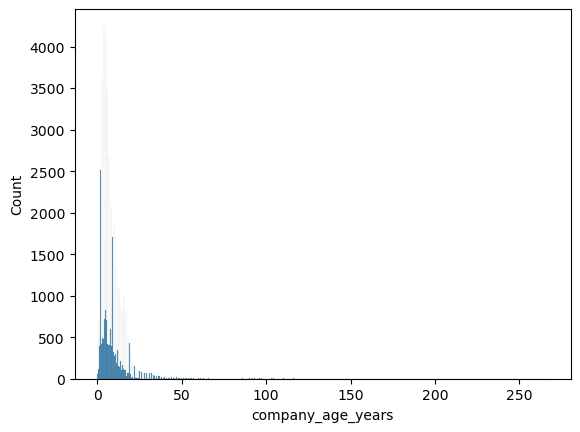

In [159]:
sns.histplot(df['company_age_years'])

In [160]:
# how many companies are there older than 50 years?
(df['company_age_years'] > 50).sum()

243

In [161]:
# drop these companies
index = df[df['company_age_years'] > 50].index
df.drop(labels=index, inplace=True)

In [162]:
# checking
df['founded_at'].min()

Timestamp('1967-01-01 00:00:00')

[Text(0.5, 1.0, 'Histogram of Company Ages in Years')]

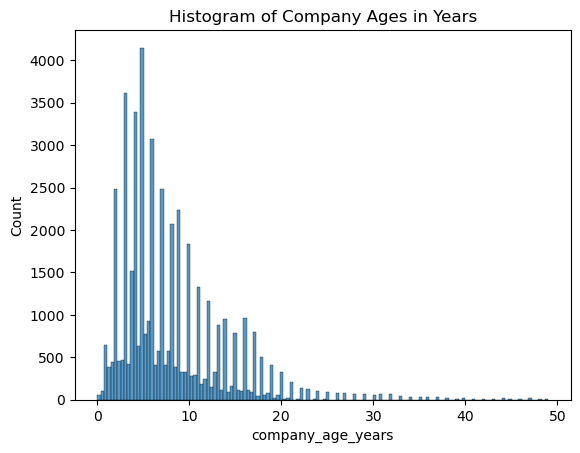

In [163]:
sns.histplot(df['company_age_years']).set(title='Histogram of Company Ages in Years')

[Text(0.5, 1.0, 'Histogram of Total Amounts Raised in Logscale')]

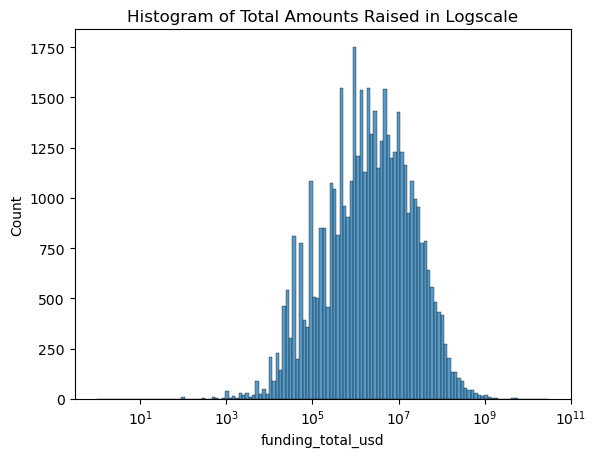

In [164]:
sns.histplot(df['funding_total_usd'], log_scale=True).set(title='Histogram of Total Amounts Raised in Logscale')

<Axes: title={'center': 'Top 10 Countries by Company Count'}, ylabel='country_code'>

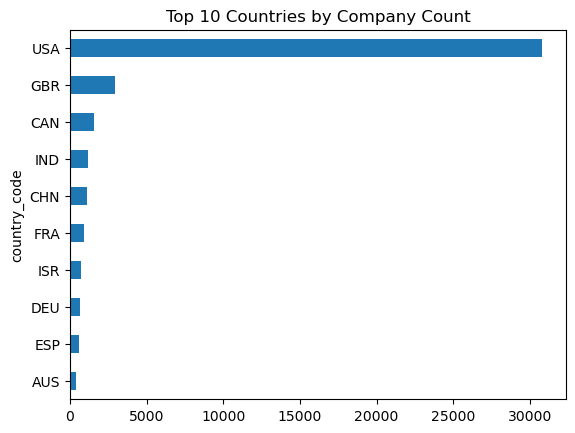

In [165]:
df['country_code'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', title='Top 10 Countries by Company Count')

In [166]:
df.groupby('status')['funding_total_usd'].mean()

status
acquired     2.822948e+07
closed       1.134754e+07
ipo          1.325684e+08
operating    1.387390e+07
Name: funding_total_usd, dtype: float64

<Axes: ylabel='status'>

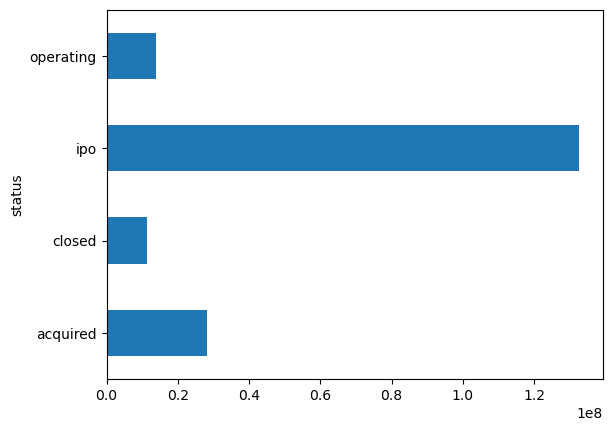

In [167]:
df.groupby('status')['funding_total_usd'].mean().plot(kind='barh')

In [168]:
df.columns

Index(['Name', 'funding_total_usd', 'status', 'country_code', 'city',
       'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at',
       'categories', 'Advertising', 'Analytics', 'Apps', 'Big Data',
       'Biotechnology', 'Clean Technology', 'Cloud Computing', 'Consulting',
       'Curated Web', 'E-Commerce', 'Education', 'Enterprise Software',
       'Entertainment', 'Fashion', 'FinTech', 'Finance', 'Financial Services',
       'Games', 'Hardware + Software', 'Health Care', 'Health and Wellness',
       'Hospitality', 'Information Technology', 'Internet', 'Manufacturing',
       'Marketplaces', 'Media', 'Medical', 'Messaging', 'Mobile', 'Music',
       'Networking', 'News', 'Real Estate', 'Retail', 'SaaS',
       'Sales and Marketing', 'Search', 'Security', 'Semiconductors',
       'Services', 'Social Media', 'Social Network Media', 'Software',
       'Sports', 'Startups', 'Technology', 'Travel', 'Video', 'Web Hosting',
       'Other', 'company_age_days', 'company_a

In [169]:
catgroup = df.groupby('successful')[['Advertising', 'Analytics', 'Apps',
       'Big Data', 'Biotechnology', 'Clean Technology', 'Cloud Computing',
       'Consulting', 'Curated Web', 'E-Commerce', 'Education',
       'Enterprise Software', 'Entertainment', 'Fashion', 'FinTech', 'Finance',
       'Financial Services', 'Games', 'Hardware + Software', 'Health Care',
       'Health and Wellness', 'Hospitality', 'Information Technology',
       'Internet', 'Manufacturing', 'Marketplaces', 'Media', 'Medical',
       'Messaging', 'Mobile', 'Music', 'Networking', 'News', 'Real Estate',
       'Retail', 'SaaS', 'Sales and Marketing', 'Search', 'Security',
       'Semiconductors', 'Services', 'Social Media', 'Social Network Media',
       'Software', 'Sports', 'Startups', 'Technology', 'Travel', 'Video',
       'Web Hosting', 'Other']].sum().T#.plot(kind='barh', stacked=True)

In [170]:
catgroup['Total'] = catgroup[0] + catgroup[1]

<Axes: title={'center': 'Success vs. Failure for Top 10 Listed Categories'}>

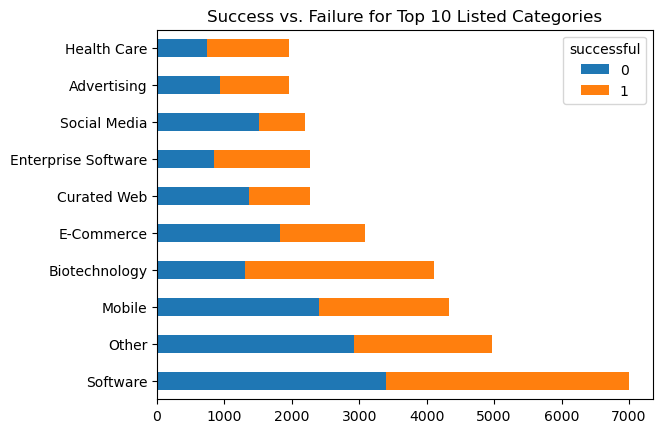

In [171]:
catgroup.sort_values('Total', ascending=False)[:10].drop(columns='Total').plot(kind='barh', stacked=True, title='Success vs. Failure for Top 10 Listed Categories')

In [172]:
temp = df.loc[df['city'].isin(list(df['city'].value_counts()[:14].index))]

<Axes: title={'center': 'Statuses for 14 Most Common Cities'}, ylabel='city'>

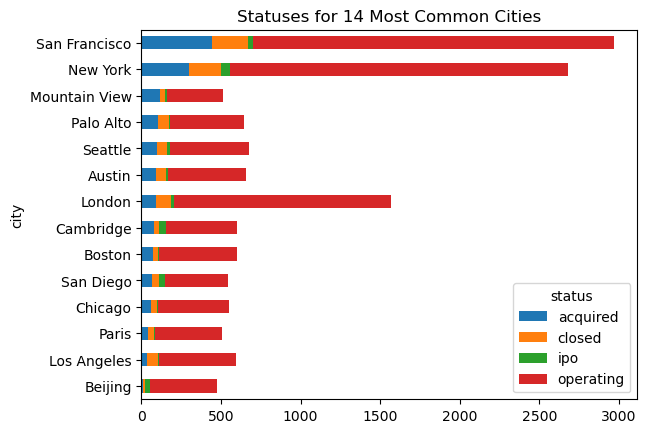

In [274]:
temp.groupby(['status', 'city'])['city'].count().unstack().T.sort_values(by='acquired').plot(kind='barh', stacked=True, title='Statuses for 14 Most Common Cities')

In [174]:
# now that I've one hot encoded the categorical columns I can remove the originals
df.drop(columns=['categories', 'founded_at', 'first_funding_at', 'last_funding_at', 'country_code', 'city', 'status', 'funding_total_usd'], inplace=True)

In [175]:
df.head()

Name  funding_rounds  Advertising  Analytics  Apps  \
0                   #fame               1            0          0     0   
1                :Qounter               2            0          0     0   
2                 0-6.com               1            0          0     0   
3      01Games Technology               1            0          0     0   
4  Ondine Biomedical Inc.               2            0          0     0   

   Big Data  Biotechnology  Clean Technology  Cloud Computing  Consulting  \
0         0              0                 0                0           0   
1         0              0                 0                0           0   
2         0              0                 0                0           0   
3         0              0                 0                0           0   
4         0              1                 0                0           0   

   Curated Web  E-Commerce  Education  Enterprise Software  Entertainment  \
0            0           0          0                    0              0   
1            0           0          0                    0              0   
2            1           0          0                    0              0   
3            0           0          0                    0              0   
4            0           0          0                    0              0   

   Fashion  FinTech  Finance  Financial Services  Games  Hardware + Software  \
0        0        0        0                   0      0                    0   
1        0        0        0                   0      0                    0   
2        0        0        0                   0      0                    0   
3        0        0        0                   0      1                    0   
4        0        0        0                   0      0                    0   

   Health Care  Health and Wellness  Hospitality  Information Technology  \
0            0                    0            0                       0   
1            0                    0            0                       0   
2            0                    0            0                       0   
3            0                    0            0                       0   
4            0                    0            0                       0   

   Internet  Manufacturing  Marketplaces  Media  Medical  Messaging  Mobile  \
0         0              0             0      1        0          0       0   
1         0              0             0      0        0          0       0   
2         0              0             0      0        0          0       0   
3         0              0             0      0        0          0       0   
4         0              0             0      0        0          0       0   

   Music  Networking  News  Real Estate  Retail  SaaS  Sales and Marketing  \
0      0           0     0            0       0     0                    0   
1      0           0     0            0       0     0                    0   
2      0           0     0            0       0     0                    0   
3      0           0     0            0       0     0                    0   
4      0           0     0            0       0     0                    0   

   Search  Security  Semiconductors  Services  Social Media  \
0       0         0               0         0             0   
1       0         0               0         0             0   
2       0         0               0         0             0   
3       0         0               0         0             0   
4       0         0               0         0             0   

   Social Network Media  Software  Sports  Startups  Technology  Travel  \
0                     0         0       0         0           0       0   
1                     1         0       0         0           0       0   
2                     0         0       0         0           0       0   
3                     0         0       0         0           0       0   
4       

In [176]:
# check for multicollinearity
corrDf = df.drop(columns=['successful', 'Name']).corr()
mask = np.triu(corrDf)

<Axes: >

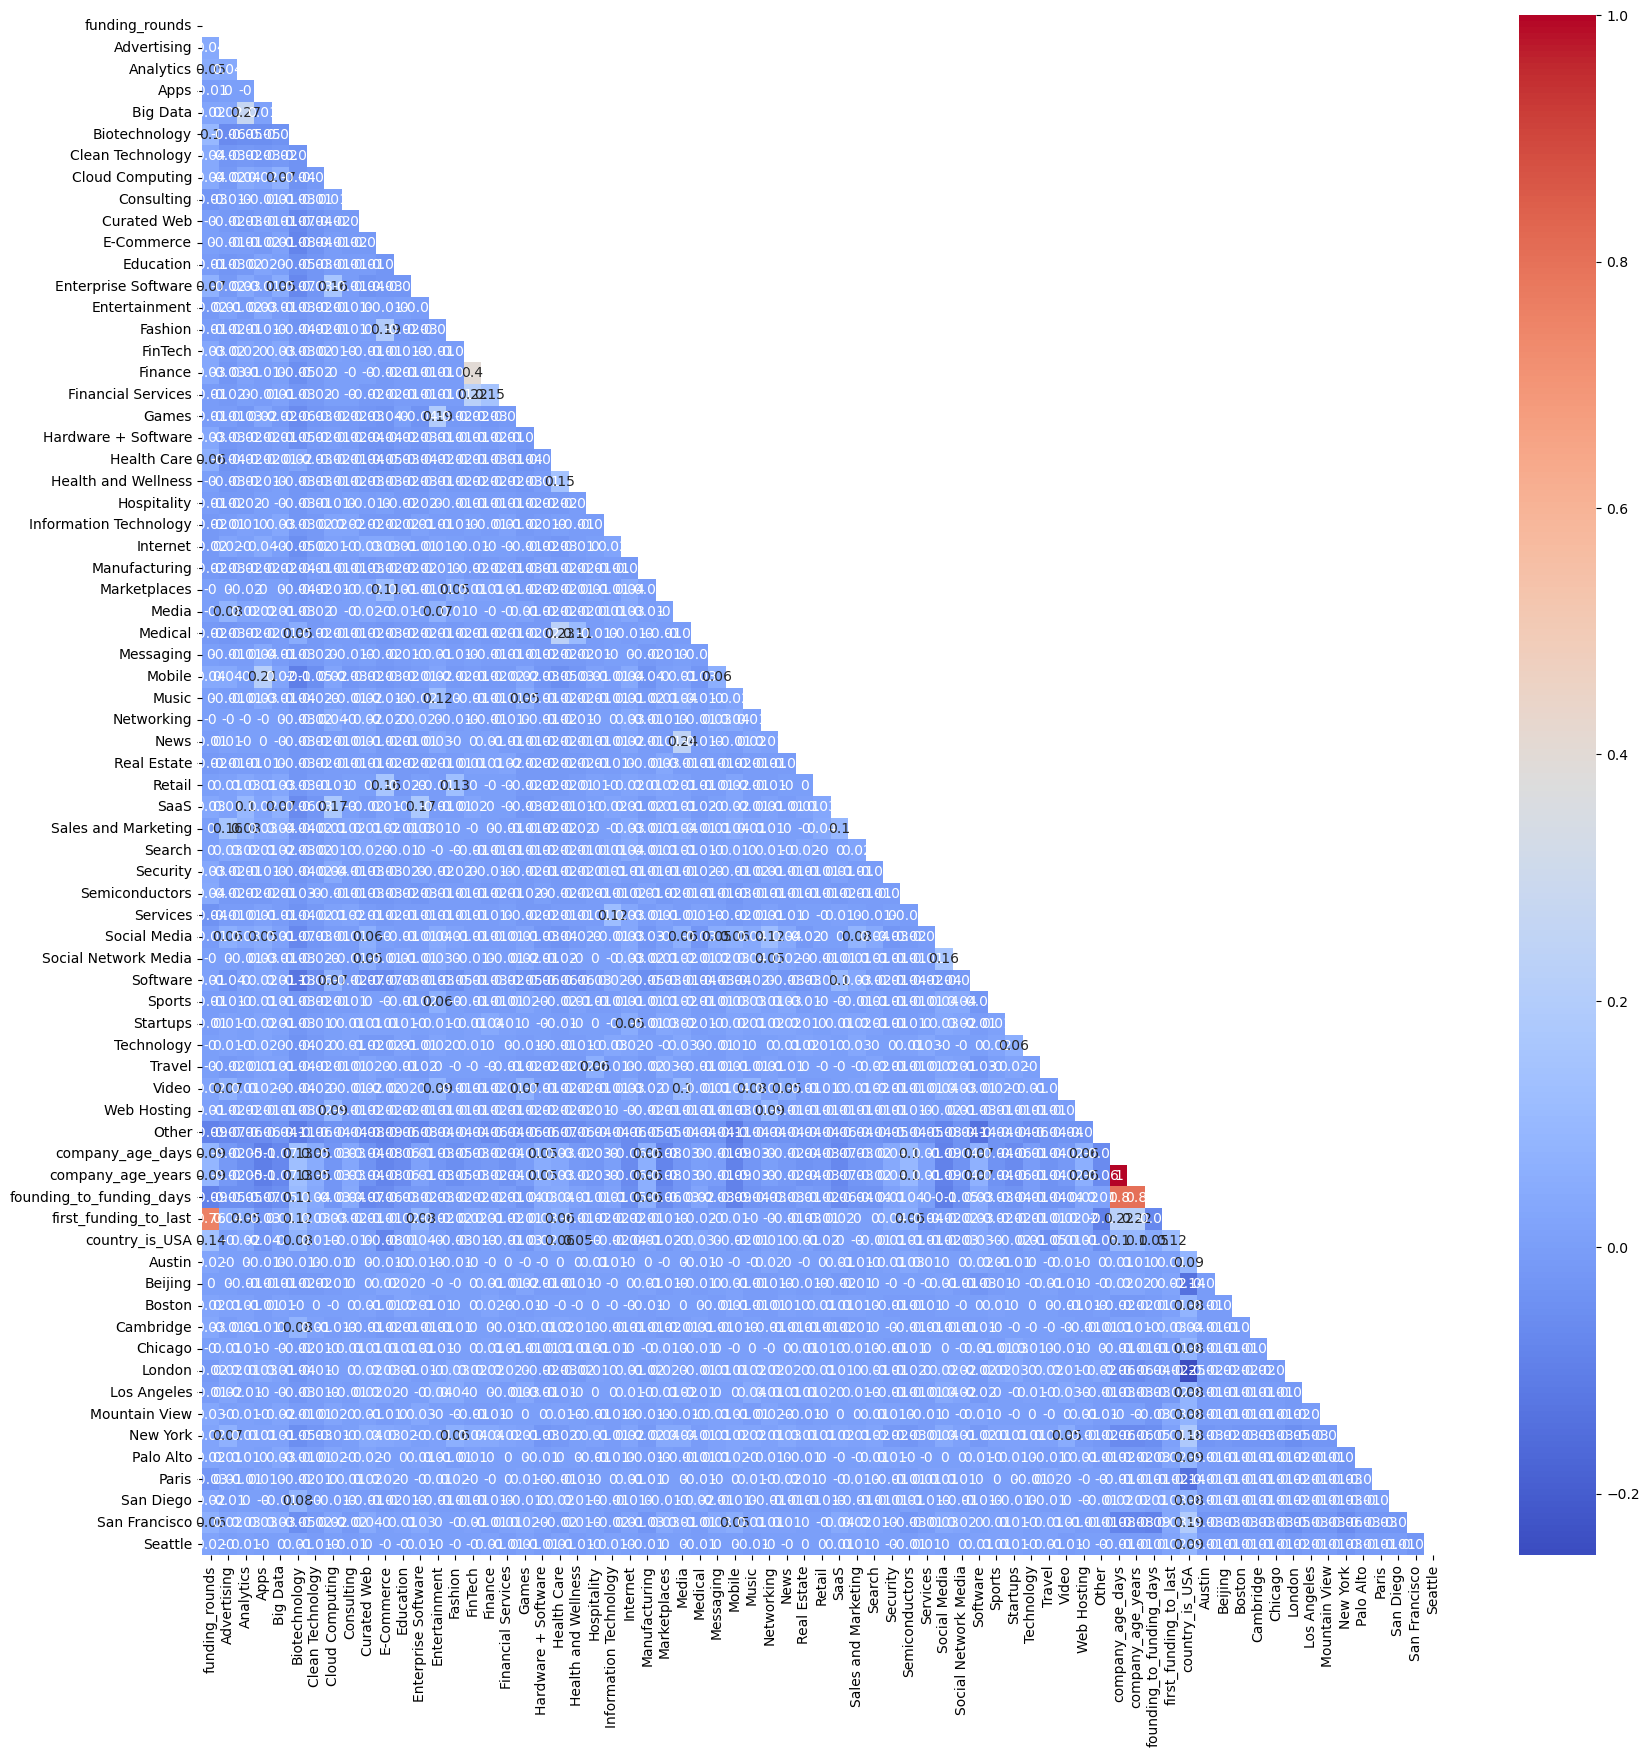

In [177]:
plt.figure(figsize=(20,20))
sns.heatmap(corrDf.round(2), annot=True, mask=mask, cmap='coolwarm')

In [178]:
np.corrcoef(df['company_age_days'], df['company_age_years'])

array([[1.        , 0.99999989],
       [0.99999989, 1.        ]])

In [179]:
np.corrcoef(df['company_age_years'], df['founding_to_funding_days'])

array([[1.       , 0.8023237],
       [0.8023237, 1.       ]])

In [180]:
np.corrcoef(df['Finance'], df['FinTech'])

array([[1.        , 0.40348534],
       [0.40348534, 1.        ]])

In [181]:
np.corrcoef(df['first_funding_to_last'], df['funding_rounds'])

array([[1.       , 0.7557665],
       [0.7557665, 1.       ]])

In [182]:
# drop problematic columns
df.drop(columns=['first_funding_to_last', 'founding_to_funding_days', 'company_age_days'], inplace=True)

In [183]:
# make a single column for finance related companies
df['Anything_Finance'] = np.where((df['FinTech'] == 1) | (df['Finance'] == 1) | (df['Financial Services'] == 1), 1, 0)

In [184]:
# drop the original finance columns
df.drop(columns=['FinTech', 'Finance', 'Financial Services'], inplace=True)

In [185]:
df.head()

Name  funding_rounds  Advertising  Analytics  Apps  \
0                   #fame               1            0          0     0   
1                :Qounter               2            0          0     0   
2                 0-6.com               1            0          0     0   
3      01Games Technology               1            0          0     0   
4  Ondine Biomedical Inc.               2            0          0     0   

   Big Data  Biotechnology  Clean Technology  Cloud Computing  Consulting  \
0         0              0                 0                0           0   
1         0              0                 0                0           0   
2         0              0                 0                0           0   
3         0              0                 0                0           0   
4         0              1                 0                0           0   

   Curated Web  E-Commerce  Education  Enterprise Software  Entertainment  \
0            0           0          0                    0              0   
1            0           0          0                    0              0   
2            1           0          0                    0              0   
3            0           0          0                    0              0   
4            0           0          0                    0              0   

   Fashion  Games  Hardware + Software  Health Care  Health and Wellness  \
0        0      0                    0            0                    0   
1        0      0                    0            0                    0   
2        0      0                    0            0                    0   
3        0      1                    0            0                    0   
4        0      0                    0            0                    0   

   Hospitality  Information Technology  Internet  Manufacturing  Marketplaces  \
0            0                       0         0              0             0   
1            0                       0         0              0             0   
2            0                       0         0              0             0   
3            0                       0         0              0             0   
4            0                       0         0              0             0   

   Media  Medical  Messaging  Mobile  Music  Networking  News  Real Estate  \
0      1        0          0       0      0           0     0            0   
1      0        0          0       0      0           0     0            0   
2      0        0          0       0      0           0     0            0   
3      0        0          0       0      0           0     0            0   
4      0        0          0       0      0           0     0            0   

   Retail  SaaS  Sales and Marketing  Search  Security  Semiconductors  \
0       0     0                    0       0         0               0   
1       0     0                    0       0         0               0   
2       0     0                    0       0         0               0   
3       0     0                    0       0         0               0   
4       0     0                    0       0         0               0   

   Services  Social Media  Social Network Media  Software  Sports  Startups  \
0         0             0                     0         0       0         0   
1         0             0                     1         0       0         0   
2         0             0                     0         0       0         0   
3         0             0                     0         0       0         0   
4         0             0                     0         0       0         0   

   Technology  Travel  Video  Web Hosting  Other  company_age_years  \
0           0       0      0            0      0               4.44   
1           0       0      0            0      0               1.71   
2           0       0      0            0      0               8.98   
3           0       0      

In [186]:
# check for multicollinearity again
corrDf = df.drop(columns=['successful', 'Name']).corr()
mask = np.triu(corrDf)

<Axes: >

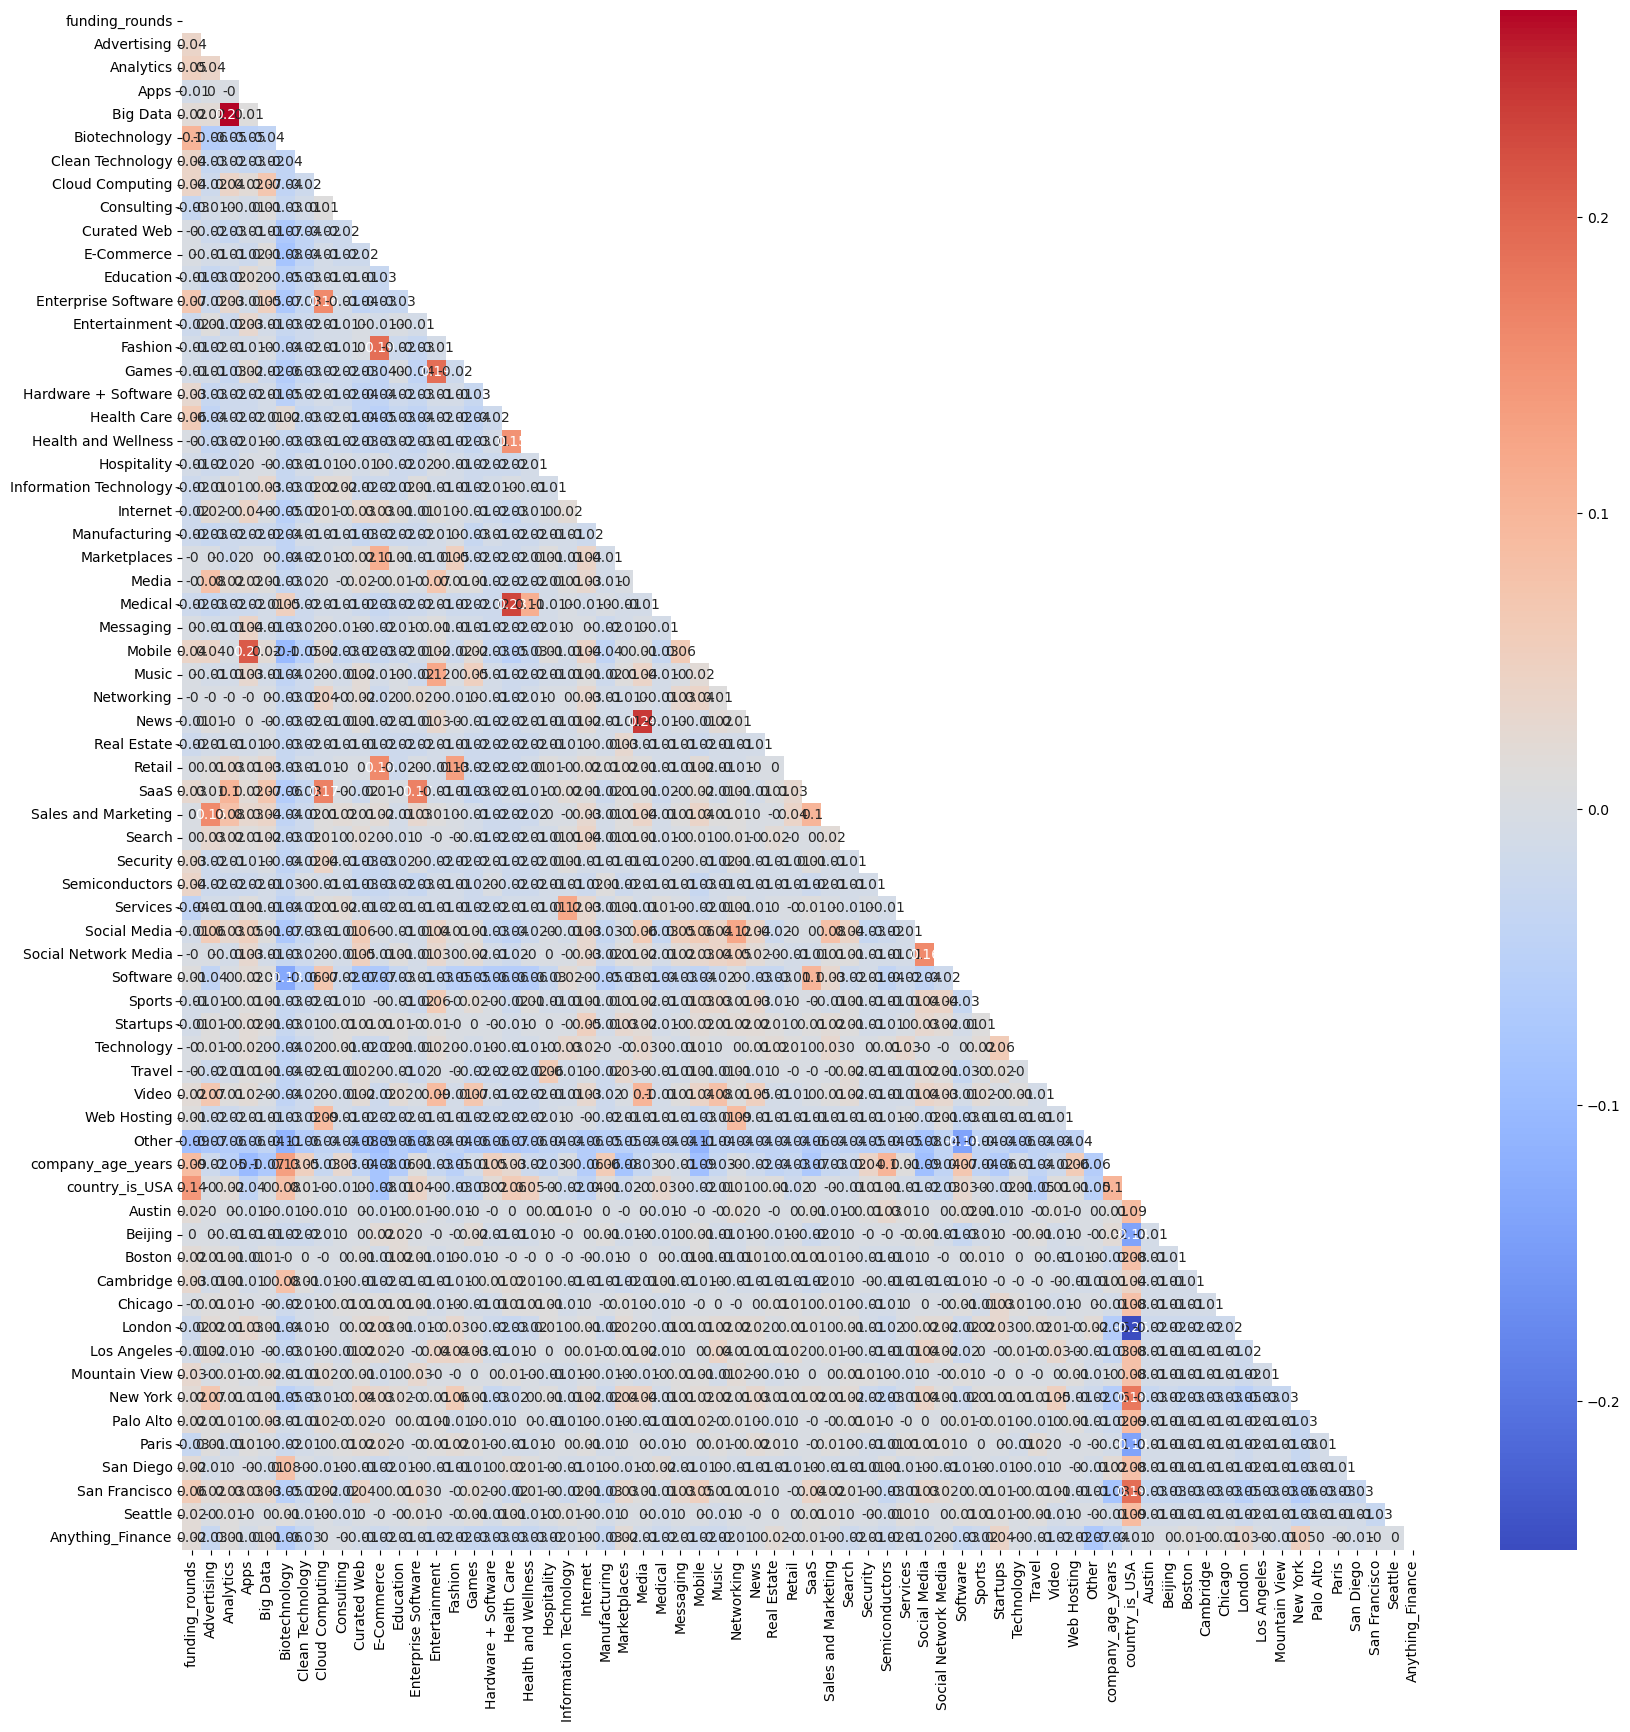

In [187]:
plt.figure(figsize=(20,20))
sns.heatmap(corrDf.round(2), annot=True, mask=mask, cmap='coolwarm')

# Modelling <a class="anchor" id="modelling"></a>

I'll manually split my train and test sets so that the models will train on companies older than 3.8 years and will be tested on newer companies. This cutoff means that there will be around 20% of the data in the test set.

In [240]:
X = df.drop(columns=['successful', 'Name'])
y = df['successful']

In [241]:
df.shape

(47340, 68)

In [242]:
X.shape

(47340, 66)

In [243]:
y.shape

(47340,)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [253]:
testdf = df[df['company_age_years'] <= 3.8]

In [254]:
traindf = df[df['company_age_years'] > 3.8]

In [255]:
X_train = traindf.drop(columns=['successful', 'Name'])
y_train = traindf['successful']
X_test = testdf.drop(columns=['successful', 'Name'])
y_test = testdf['successful']

## Logistic Regression Model <a class="anchor" id="logregmodel"></a>

In [256]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(max_iter=10000)

# fit it to training data
logreg_model.fit(X_train, y_train)

# score the accuracy of the model
lr_train_score = logreg_model.score(X_train, y_train)
lr_test_score = logreg_model.score(X_test, y_test)

print(f"Score on training set: {lr_train_score}")
print(f"Score on test set: {lr_test_score}")

Score on training set: 0.715635942395282
Score on test set: 0.7684086779950839


In [257]:
# Generate confusion matrix
lr_pred = logreg_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, lr_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Failure", "Predicted Success"],
    index=["True Failure", "True Success"]
)

display(cf_df)

Predicted Failure  Predicted Success
True Failure               6497                633
True Success               1534                693

In [258]:

lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print(f'precision = {lr_precision}, recall = {lr_recall}, f1 = {lr_f1}')

precision = 0.5226244343891403, recall = 0.3111809609339919, f1 = 0.39009287925696595


In [259]:
# creating a dataframe of the coefficients
coef = pd.DataFrame(logreg_model.coef_,  columns = X_train.columns)

In [260]:
coef

funding_rounds  Advertising  Analytics     Apps  Big Data  Biotechnology  \
0        0.687978     0.135645   0.282018 -0.27664   0.20121       0.428251   

   Clean Technology  Cloud Computing  Consulting  Curated Web  E-Commerce  \
0          0.459215         0.043316   -0.319695    -0.345215   -0.139985   

   Education  Enterprise Software  Entertainment   Fashion    Games  \
0  -0.337889             0.404817       0.053862  0.068704 -0.14824   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
0             0.024792     0.371313            -0.033064    -0.158529   

   Information Technology  Internet  Manufacturing  Marketplaces     Media  \
0                0.296125 -0.077813       0.110672     -0.380194  0.129003   

    Medical  Messaging   Mobile     Music  Networking      News  Real Estate  \
0  0.059279  -0.285298  0.01404 -0.557745    0.012355 -0.033612     0.035939   

    Retail      SaaS  Sales and Marketing    Search  Security  Semiconductors  \
0  0.04194 -0.206773            -0.007417 -0.307574  0.349465        0.719192   

   Services  Social Media  Social Network Media  Software    Sports  Startups  \
0 -0.105002     -0.503824               -0.4825 -0.034401 -0.347828 -0.206475   

   Technology    Travel     Video  Web Hosting     Other  company_age_years  \
0    0.199881 -0.069806  0.047108     0.414173  0.089094           0.112409   

   country_is_USA    Austin   Beijing    Boston  Cambridge   Chicago  \
0        0.035724  0.140091  1.401874  0.446038   0.600982  0.210659   

     London  Los Angeles  Mountain View  New York  Palo Alto     Paris  \
0  0.100544     0.041782       0.741418  0.338891   0.544291  0.415526   

   San Diego  San Francisco   Seattle  Anything_Finance  
0   0.309105        0.62819  0.206703          0.284425

In [261]:
# adding the odds ratios to the dataframe to look at them side by side with the coefficients
coef.loc[1] = np.exp(logreg_model.coef_)[0]
coef.rename({0:'coefficients', 1:'odds_ratios'}, inplace=True)

In [262]:
# sorting by coefficients, descending --> positively correlates with success
coef.sort_values(axis=1, by='coefficients', ascending=False)

Beijing  Mountain View  Semiconductors  funding_rounds  \
coefficients  1.401874       0.741418        0.719192        0.687978   
odds_ratios   4.062805       2.098909        2.052775        1.989688   

              San Francisco  Cambridge  Palo Alto  Clean Technology    Boston  \
coefficients       0.628190   0.600982   0.544291          0.459215  0.446038   
odds_ratios        1.874215   1.823909   1.723385          1.582832  1.562110   

              Biotechnology     Paris  Web Hosting  Enterprise Software  \
coefficients       0.428251  0.415526     0.414173             0.404817   
odds_ratios        1.534571  1.515168     1.513119             1.499028   

              Health Care  Security  New York  San Diego  \
coefficients     0.371313  0.349465  0.338891   0.309105   
odds_ratios      1.449636  1.418308  1.403390   1.362205   

              Information Technology  Anything_Finance  Analytics   Chicago  \
coefficients                0.296125          0.284425   0.282018  0.210659   
odds_ratios                 1.344638          1.328998   1.325803  1.234492   

               Seattle  Big Data  Technology    Austin  Advertising     Media  \
coefficients  0.206703  0.201210    0.199881  0.140091     0.135645  0.129003   
odds_ratios   1.229618  1.222881    1.221257  1.150378     1.145275  1.137694   

              company_age_years  Manufacturing    London     Other   Fashion  \
coefficients           0.112409       0.110672  0.100544  0.089094  0.068704   
odds_ratios            1.118970       1.117028  1.105772  1.093184  1.071119   

               Medical  Entertainment     Video  Cloud Computing    Retail  \
coefficients  0.059279       0.053862  0.047108         0.043316  0.041940   
odds_ratios   1.061071       1.055339  1.048235         1.044267  1.042832   

              Los Angeles  Real Estate  country_is_USA  Hardware + Software  \
coefficients     0.041782     0.035939        0.035724             0.024792   
odds_ratios      1.042668     1.036592        1.036370             1.025102   

                Mobile  Networking  Sales and Marketing  Health and Wellness  \
coefficients  0.014040    0.012355            -0.007417            -0.033064   
odds_ratios   1.014139    1.012432             0.992611             0.967476   

                  News  Software    Travel  Internet  Services  E-Commerce  \
coefficients -0.033612 -0.034401 -0.069806 -0.077813 -0.105002   -0.139985   
odds_ratios   0.966947  0.966184  0.932575  0.925137  0.900322    0.869371   

                 Games  Hospitality  Startups      SaaS      Apps  Messaging  \
coefficients -0.148240    -0.158529 -0.206475 -0.206773 -0.276640  -0.285298   
odds_ratios   0.862224     0.853398  0.813446  0.813204  0.758327   0.751790   

                Search  Consulting  Education  Curated Web    Sports  \
coefficients -0.307574   -0.319695  -0.337889    -0.345215 -0.347828   
odds_ratios   0.735228    0.726370   0.713275     0.708068  0.706221   

              Marketplaces  Social Network Media  Social Media     Music  
coefficients     -0.380194             -0.482500     -0.503824 -0.557745  
odds_ratios       0.683729              0.617238      0.604216  0.572499

<Axes: title={'center': 'Coefficients from Logistic Regression'}>

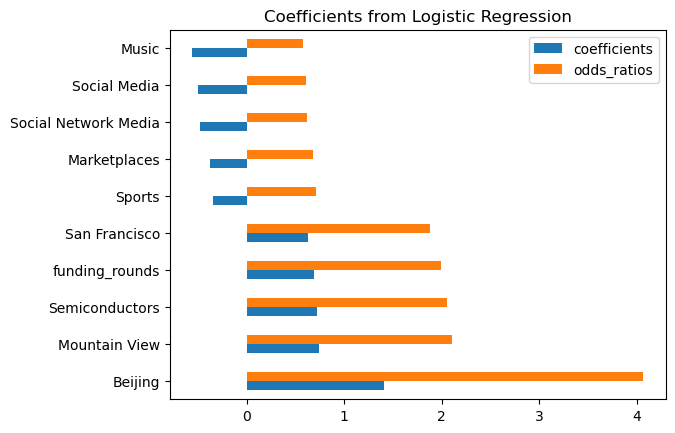

In [264]:
coef.sort_values(axis=1, by='coefficients', ascending=False)[['Beijing', 'Mountain View', 'Semiconductors', 'funding_rounds', 'San Francisco', 'Sports', 'Marketplaces', 'Social Network Media', 'Social Media', 'Music']].T.plot(kind='barh', title='Coefficients from Logistic Regression')

In [161]:
# sorting by coefficients, ascending --> negatively correlates with success
coef.sort_values(axis=1, by='coefficients')

Music  Social Media  Social Network Media  Marketplaces  \
coefficients -0.557745     -0.503824             -0.482500     -0.380194   
odds_ratios   0.572499      0.604216              0.617238      0.683729   

                Sports  Curated Web  Education  Consulting    Search  \
coefficients -0.347828    -0.345215  -0.337889   -0.319695 -0.307574   
odds_ratios   0.706221     0.708068   0.713275    0.726370  0.735228   

              Messaging      Apps      SaaS  Startups  Hospitality     Games  \
coefficients  -0.285298 -0.276640 -0.206773 -0.206475    -0.158529 -0.148240   
odds_ratios    0.751790  0.758327  0.813204  0.813446     0.853398  0.862224   

              E-Commerce  Services  Internet    Travel  Software      News  \
coefficients   -0.139985 -0.105002 -0.077813 -0.069806 -0.034401 -0.033612   
odds_ratios     0.869371  0.900322  0.925137  0.932575  0.966184  0.966947   

              Health and Wellness  Sales and Marketing  Networking    Mobile  \
coefficients            -0.033064            -0.007417    0.012355  0.014040   
odds_ratios              0.967476             0.992611    1.012432  1.014139   

              Hardware + Software  country_is_USA  Real Estate  Los Angeles  \
coefficients             0.024792        0.035724     0.035939     0.041782   
odds_ratios              1.025102        1.036370     1.036592     1.042668   

                Retail  Cloud Computing     Video  Entertainment   Medical  \
coefficients  0.041940         0.043316  0.047108       0.053862  0.059279   
odds_ratios   1.042832         1.044267  1.048235       1.055339  1.061071   

               Fashion     Other    London  Manufacturing  company_age_years  \
coefficients  0.068704  0.089094  0.100544       0.110672           0.112409   
odds_ratios   1.071119  1.093184  1.105772       1.117028           1.118970   

                 Media  Advertising    Austin  Technology  Big Data   Seattle  \
coefficients  0.129003     0.135645  0.140091    0.199881  0.201210  0.206703   
odds_ratios   1.137694     1.145275  1.150378    1.221257  1.222881  1.229618   

               Chicago  Analytics  Anything_Finance  Information Technology  \
coefficients  0.210659   0.282018          0.284425                0.296125   
odds_ratios   1.234492   1.325803          1.328998                1.344638   

              San Diego  New York  Security  Health Care  Enterprise Software  \
coefficients   0.309105  0.338891  0.349465     0.371313             0.404817   
odds_ratios    1.362205  1.403390  1.418308     1.449636             1.499028   

              Web Hosting     Paris  Biotechnology    Boston  \
coefficients     0.414173  0.415526       0.428251  0.446038   
odds_ratios      1.513119  1.515168       1.534571  1.562110   

              Clean Technology  Palo Alto  Cambridge  San Francisco  \
coefficients          0.459215   0.544291   0.600982       0.628190   
odds_ratios           1.582832   1.723385   1.823909       1.874215   

              funding_rounds  Semiconductors  Mountain View   Beijing  
coefficients        0.687978        0.719192       0.741418  1.401874  
odds_ratios         1.989688        2.052775       2.098909  4.062805

## Decision Tree Model <a class="anchor" id="dtmodel"></a>

In [209]:
# instantiate decision tree
dt_model = DecisionTreeClassifier(max_depth=7)

# fit it to training data
dt_model.fit(X_train, y_train)

# score the accuracy
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

print(f"Score on training set: {dt_train_score}")
print(f"Score on test set: {dt_test_score}")

Score on training set: 0.7323352344740177
Score on test set: 0.7246514575411914


In [210]:
dt_pred = dt_model.predict(X_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print(f'precision = {dt_precision}, recall = {dt_recall}, f1 = {dt_f1}')

precision = 0.7437591776798825, recall = 0.6607958251793868, f1 = 0.6998272884283246


In [ ]:
# without going in-depth into hyperparameter optimization, I can see that this tree model is more accurate than the logistic regression by about 1%

## Random Forest Model <a class="anchor" id="rfmodel"></a>

In [211]:
# instantiate
rf_model = RandomForestClassifier(n_estimators=50, max_depth=9)

# fit
rf_model.fit(X_train, y_train)

# score
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print(f"Score on training set: {rf_train_score}")
print(f"Score on test set: {rf_test_score}")

Score on training set: 0.7391212505280946
Score on test set: 0.7269750739332488


In [212]:
rf_pred = rf_model.predict(X_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f'precision = {rf_precision}, recall = {rf_recall}, f1 = {rf_f1}')

precision = 0.7265976597659766, recall = 0.7021091541639487, f1 = 0.7141435364370231


In [ ]:
# no better than decision tree 

## Support Vector Machine Model <a class="anchor" id="svmmodel"></a>

In [219]:
# instantiate
svm_model = LinearSVC(dual='auto')

# fit
svm_model.fit(X_train, y_train)

# score
svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

print(f"Score on training set: {svm_train_score}")
print(f"Score on test set: {svm_test_score}")

Score on training set: 0.7145301845562488
Score on test set: 0.7726835524206477


In [220]:
svm_pred = svm_model.predict(X_test)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f'precision = {svm_precision}, recall = {svm_recall}, f1 = {svm_f1}')

precision = 0.5413907284768212, recall = 0.29366861248316123, f1 = 0.38078602620087343


In [ ]:
# instantiate
svc_model = SVC()

# fit
svc_model.fit(X_train, y_train)

# score
svc_train_score = svc_model.score(X_train, y_train)
svc_test_score = svc_model.score(X_test, y_test)

print(f"Score on training set: {svc_train_score}")
print(f"Score on test set: {svc_test_score}")

In [ ]:
# go through model evaluation notebook, plot ROC curves

## GridSearch

## Neural Network <a class="anchor" id="nnmodel"></a>

In [213]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2)) # Set 20% of the nodes to 0.
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    verbose=1,
                    # Pass in a validation data set to test each epoch.
                    validation_data=(X_test, y_test))

Epoch 1/50
1184/1184 [==============================] - 1s 590us/step - loss: 0.5911 - binary_accuracy: 0.6868 - val_loss: 0.5614 - val_binary_accuracy: 0.7268
Epoch 2/50
1184/1184 [==============================] - 1s 544us/step - loss: 0.5581 - binary_accuracy: 0.7211 - val_loss: 0.5504 - val_binary_accuracy: 0.7275
Epoch 3/50
1184/1184 [==============================] - 1s 539us/step - loss: 0.5521 - binary_accuracy: 0.7232 - val_loss: 0.5523 - val_binary_accuracy: 0.7290
Epoch 4/50
1184/1184 [==============================] - 1s 540us/step - loss: 0.5483 - binary_accuracy: 0.7263 - val_loss: 0.5531 - val_binary_accuracy: 0.7294
Epoch 5/50
1184/1184 [==============================] - 1s 544us/step - loss: 0.5463 - binary_accuracy: 0.7259 - val_loss: 0.5481 - val_binary_accuracy: 0.7298
Epoch 6/50
1184/1184 [==============================] - 1s 540us/step - loss: 0.5440 - binary_accuracy: 0.7290 - val_loss: 0.5457 - val_binary_accuracy: 0.7285
Epoch 7/50
1184/1184 [==================

In [ ]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(67, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(7, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(3, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    verbose=1,
                    # Pass in a validation data set to test each epoch.
                    validation_data=(X_test, y_test))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Analysis With Descriptions <a class="anchor" id="descriptions"></a>

In [9]:
# loading in the description data
desc = pd.read_csv('Data/descriptions.csv')

In [10]:
desc.head()

name     city  \
0          Campus Bubble  Atlanta   
1               DueProps  Atlanta   
2              SalesLoft  Atlanta   
3  The Coca-Cola Company  Atlanta   
4              EarthLink  Atlanta   

                                             tagline  \
0                             Your Academic Identity   
1  Gamifying the $46 Billion Employee Incentives ...   
2          Quickly build high-quality prospect lists   
3                                                NaN   
4                                                NaN   

                                         description  
0  Campus Bubble (“CB”) is the Academic Community...  
1                                t unprecedented ...  
2                build high-quality prospect lists\n  
3  Coca-Cola Journey is a digital magazine that f...  
4                                                NaN

In [11]:
data_world = desc.copy()

In [12]:
data_world.drop(columns='city', inplace=True)

In [13]:
data_world.head()

name                                            tagline  \
0          Campus Bubble                             Your Academic Identity   
1               DueProps  Gamifying the $46 Billion Employee Incentives ...   
2              SalesLoft          Quickly build high-quality prospect lists   
3  The Coca-Cola Company                                                NaN   
4              EarthLink                                                NaN   

                                         description  
0  Campus Bubble (“CB”) is the Academic Community...  
1                                t unprecedented ...  
2                build high-quality prospect lists\n  
3  Coca-Cola Journey is a digital magazine that f...  
4                                                NaN

In [35]:
desc.isna().sum()

name              4
city              0
tagline        5308
description    4864
dtype: int64

In [36]:
desc.shape

(42038, 4)

In [38]:
for i in range(1, 10):
    print(i, desc['description'][i-1], '\n')

1 Campus Bubble (“CB”) is the Academic Community Network just as LinkedIn is the professional community network, and Facebook is the social community network. CB provides academic institutions with a student powered, cross platform, private online community, focused ... 

2 t unprecedented ... 

3  build high-quality prospect lists
 

4 Coca-Cola Journey is a digital magazine that focuses on important topics, social causes and news about The Coca-Cola Company. 

5 nan 

6 REscour is a data platform and decision engine that utilizes proprietary market analysis based on massive data aggregation to identify commercial real estate investment opportunities. REscour is not one-size-fits-all and communicates custom, tailored recommendations ... 

7 viaCycle creates bicycle sharing technology that is flexible, inexpensive, and easy to use.  Users can unlock our smart bikes instantly using their cell phone. Operators can place bikes anywhere, with no kiosks or special infrastructure required.  

In [23]:
desc.dropna(inplace=True)

In [24]:
desc['description_length'] = desc['description'].apply(len)

In [25]:
desc.head()

name     city                                            tagline  \
0  Campus Bubble  Atlanta                             Your Academic Identity   
1       DueProps  Atlanta  Gamifying the $46 Billion Employee Incentives ...   
2      SalesLoft  Atlanta          Quickly build high-quality prospect lists   
5        REscour  Atlanta  Market intelligence and analytics for commerci...   
6       viaCycle  Atlanta  Zipcar for bicycles. Call or text, unlock, and...   

                                         description  description_length  
0  Campus Bubble (“CB”) is the Academic Community...                 268  
1                                t unprecedented ...                  19  
2                build high-quality prospect lists\n                  35  
5  REscour is a data platform and decision engine...                 270  
6  viaCycle creates bicycle sharing technology th...                 266

<Axes: ylabel='Frequency'>

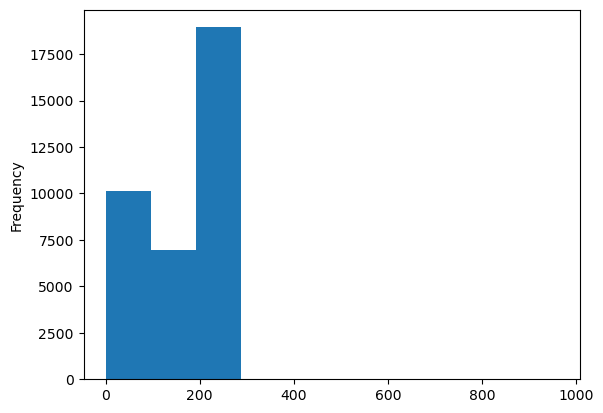

In [31]:
desc['description_length'].plot(kind='hist')

In [28]:
len('I need to get unformatted versions for all names in both data sets so that the join can get the most possible matches. To do this I will strip the name columns of all spaces or extra characters and make them lower case.')

219

I need to get unformatted versions for all names in both data sets so that the join can get the most possible matches. To do this I will strip the name columns of all spaces or extra characters and make them lower case.

In [166]:
# instantiating unformatted name column in description dataset
desc['name_unformatted'] = desc['name']

In [175]:
for i in range(len(desc['name_unformatted'])):
    desc['name_unformatted'][i] = str(desc['name_unformatted'][i]).lower().replace(' ', '') # makes everything lowercase and removes spaces
    if not desc['name_unformatted'][i].isalnum():
        for char in desc['name_unformatted'][i]:
            if not char.isalnum():
                desc['name_unformatted'][i] = desc['name_unformatted'][i].replace(char, '') # removes non-alphanumeric characters

In [177]:
desc.tail() # looks good

name           city  \
42033  Venture Philanthrophy Partners  Washington DC   
42034             The Shopping Asylum  Washington DC   
42035                 UP Technologies  Washington DC   
42036      Galaxie restaurant and bar  Washington DC   
42037                  Avenger Mobile  Washington DC   

                                                 tagline  \
42033                                                NaN   
42034                         Online QVC For Millennial    
42035       Ultra Portable Commercial Hardware Solutions   
42036            concept of a unique, modern restaurant    
42037  Avenger Mobile aims to create apps that solve ...   

                                             description  \
42033                                                NaN   
42034                                                NaN   
42035  Ultra Portable Technologies (UP Technologies) ...   
42036  Concept of a modern 10 -15 000 sf restaurant w...   
42037   Mobile aims to create apps that solve real-wo...   

                   name_unformatted  
42033  venturephilanthrophypartners  
42034             theshoppingasylum  
42035                uptechnologies  
42036       galaxierestaurantandbar  
42037                 avengermobile

In [184]:
# now do the same for the original dataframe
df['name_unformatted'] = df['Name']

In [185]:
df.head()

Name  funding_rounds  Advertising  Analytics  Apps  \
0                   #fame               1            0          0     0   
1                :Qounter               2            0          0     0   
2                 0-6.com               1            0          0     0   
3      01Games Technology               1            0          0     0   
4  Ondine Biomedical Inc.               2            0          0     0   

   Big Data  Biotechnology  Clean Technology  Cloud Computing  Consulting  \
0         0              0                 0                0           0   
1         0              0                 0                0           0   
2         0              0                 0                0           0   
3         0              0                 0                0           0   
4         0              1                 0                0           0   

   Curated Web  E-Commerce  Education  Enterprise Software  Entertainment  \
0            0           0          0                    0              0   
1            0           0          0                    0              0   
2            1           0          0                    0              0   
3            0           0          0                    0              0   
4            0           0          0                    0              0   

   Fashion  Games  Hardware + Software  Health Care  Health and Wellness  \
0        0      0                    0            0                    0   
1        0      0                    0            0                    0   
2        0      0                    0            0                    0   
3        0      1                    0            0                    0   
4        0      0                    0            0                    0   

   Hospitality  Information Technology  Internet  Manufacturing  Marketplaces  \
0            0                       0         0              0             0   
1            0                       0         0              0             0   
2            0                       0         0              0             0   
3            0                       0         0              0             0   
4            0                       0         0              0             0   

   Media  Medical  Messaging  Mobile  Music  Networking  News  Real Estate  \
0      1        0          0       0      0           0     0            0   
1      0        0          0       0      0           0     0            0   
2      0        0          0       0      0           0     0            0   
3      0        0          0       0      0           0     0            0   
4      0        0          0       0      0           0     0            0   

   Retail  SaaS  Sales and Marketing  Search  Security  Semiconductors  \
0       0     0                    0       0         0               0   
1       0     0                    0       0         0               0   
2       0     0                    0       0         0               0   
3       0     0                    0       0         0               0   
4       0     0                    0       0         0               0   

   Services  Social Media  Social Network Media  Software  Sports  Startups  \
0         0             0                     0         0       0         0   
1         0             0                     1         0       0         0   
2         0             0                     0         0       0         0   
3         0             0                     0         0       0         0   
4         0             0                     0         0       0         0   

   Technology  Travel  Video  Web Hosting  Other  company_age_years  \
0           0       0      0            0      0               4.44   
1           0       0      0            0      0               1.71   
2           0       0      0            0      0               8.98   
3           0       0      

In [186]:
df.reset_index(drop=True, inplace=True)

In [187]:
for i in range(len(df['name_unformatted'])):
    df.at[i, 'name_unformatted'] = str(df['name_unformatted'][i]).lower().replace(' ', '') # makes everything lowercase and removes spaces
    if not df['name_unformatted'][i].isalnum():
        for char in df['name_unformatted'][i]:
            if not char.isalnum():
                df.at[i, 'name_unformatted'] = df['name_unformatted'][i].replace(char, '') # removes non-alphanumeric characters

In [188]:
df.tail() # looks good

Name  funding_rounds  Advertising  Analytics  \
47335                     Zytoprotec               1            0          0   
47336                          Zzish               3            0          1   
47337  ZZNode Science and Technology               1            0          0   
47338          Zzzzapp Wireless ltd.               4            1          0   
47339                          Ôasys               1            0          0   

       Apps  Big Data  Biotechnology  Clean Technology  Cloud Computing  \
47335     0         0              1                 0                0   
47336     0         0              0                 0                0   
47337     0         0              0                 0                0   
47338     0         0              0                 0                0   
47339     0         0              0                 0                0   

       Consulting  Curated Web  E-Commerce  Education  Enterprise Software  \
47335           0            0           0          0                    0   
47336           0            0           0          1                    0   
47337           0            0           0          0                    1   
47338           0            0           0          0                    0   
47339           0            0           0          0                    0   

       Entertainment  Fashion  Games  Hardware + Software  Health Care  \
47335              0        0      0                    0            0   
47336              0        0      0                    0            0   
47337              0        0      0                    0            0   
47338              0        0      0                    0            0   
47339              0        0      0                    0            0   

       Health and Wellness  Hospitality  Information Technology  Internet  \
47335                    0            0                       0         0   
47336                    0            0                       0         0   
47337                    0            0                       0         0   
47338                    0            0                       0         0   
47339                    0            0                       0         0   

       Manufacturing  Marketplaces  Media  Medical  Messaging  Mobile  Music  \
47335              0             0      0        0          0       0      0   
47336              0             0      0        0          0       0      0   
47337              0             0      0        0          0       0      0   
47338              0             0      0        0          0       1      0   
47339              0             0      0        0          0       0      0   

       Networking  News  Real Estate  Retail  SaaS  Sales and Marketing  \
47335           0     0            0       0     0                    0   
47336           0     0            0       0     0                    0   
47337           0     0            0       0     0                    0   
47338           0     0            0       0     0                    0   
47339           0     0            0       0     0                    0   

       Search  Security  Semiconductors  Services  Social Media  \
47335       0         0               0         0             0   
47336       0         0               0         0             0   
47337       0         0               0         0             0   
47338       0         0               0         0             0   
47339       0         0               0         0             0   

       Social Network Media  Software  Sports  Startups  Technology  Travel  \
47335                     0         0       0         0           0       0   
47336                     0         0       0         0           0       0   
47337                     0         0       0         0           0       0   
47338                     0         0       0         0           0     

In [189]:
# joining these two dataframes on the unformatted name columns
startups = desc.join(df.set_index('name_unformatted'), on='name_unformatted', how='inner', lsuffix='_description', rsuffix='_nodescription')

In [190]:
startups.head()

name     city                                            tagline  \
1   DueProps  Atlanta  Gamifying the $46 Billion Employee Incentives ...   
2  SalesLoft  Atlanta          Quickly build high-quality prospect lists   
4  EarthLink  Atlanta                                                NaN   
5    REscour  Atlanta  Market intelligence and analytics for commerci...   
8    Kabbage  Atlanta                                                NaN   

                                         description name_unformatted  \
1                                t unprecedented ...         dueprops   
2                build high-quality prospect lists\n        salesloft   
4                                                NaN        earthlink   
5  REscour is a data platform and decision engine...          rescour   
8  Kabbage delivers small businesses financing. B...          kabbage   

        Name  funding_rounds  Advertising  Analytics  Apps  Big Data  \
1   DueProps               1            0          0     0         0   
2  SalesLoft               4            0          0     0         0   
4  EarthLink               1            0          0     0         0   
5    REscour               2            0          0     0         0   
8    Kabbage              11            0          0     0         0   

   Biotechnology  Clean Technology  Cloud Computing  Consulting  Curated Web  \
1              0                 0                0           0            0   
2              0                 0                0           0            0   
4              0                 0                0           0            1   
5              0                 0                0           0            0   
8              0                 0                0           0            0   

   E-Commerce  Education  Enterprise Software  Entertainment  Fashion  Games  \
1           0          0                    0              0        0      1   
2           0          0                    0              0        0      0   
4           0          0                    0              0        0      0   
5           0          0                    0              0        0      0   
8           0          0                    0              0        0      0   

   Hardware + Software  Health Care  Health and Wellness  Hospitality  \
1                    0            0                    0            0   
2                    0            0                    0            0   
4                    0            0                    0            0   
5                    0            0                    0            0   
8                    0            0                    0            0   

   Information Technology  Internet  Manufacturing  Marketplaces  Media  \
1                       0         0              0             0      0   
2                       0         0              0             0      0   
4                       0         0              0             0      0   
5                       0         0              0             0      0   
8                       0         0              0             0      0   

   Medical  Messaging  Mobile  Music  Networking  News  Real Estate  Retail  \
1        0          0       0      0           0     0            0       0   
2        0          0       0      0           0     0            0       0   
4        0          0       0      0           0     0            0       0   
5        0          0       0      0           0     0            1       0   
8        0          0       0      0           0     0            0       0   

   SaaS  Sales and Marketing  Search  Security  Semiconductors  Services  \
1     0                    0       0         0               0         0   
2     1                    1       0         0               0         0   
4     0                    0       0         0               0         0   
5     0                    0       0         0  

In [191]:
startups.shape

(8613, 73)

In [192]:
startups.isna().sum()

name                   0
city                   0
tagline             2113
description         1819
name_unformatted       0
                    ... 
San Diego              0
San Francisco          0
Seattle                0
successful             0
Anything_Finance       0
Length: 73, dtype: int64

In [193]:
startups.dropna(subset='description', inplace=True)

In [194]:
startups.reset_index(drop=True, inplace=True)

In [195]:
startups.shape

(6794, 73)

In [197]:
startups.drop(columns='tagline', inplace=True)

In [200]:
startups.isna().sum()

name                0
city                0
description         0
name_unformatted    0
Name                0
                   ..
San Diego           0
San Francisco       0
Seattle             0
successful          0
Anything_Finance    0
Length: 72, dtype: int64

In [201]:
startups['description_length'] = startups['description'].apply(len)

In [202]:
startups.head()

name     city                                        description  \
0   DueProps  Atlanta                                t unprecedented ...   
1  SalesLoft  Atlanta                build high-quality prospect lists\n   
2    REscour  Atlanta  REscour is a data platform and decision engine...   
3    Kabbage  Atlanta  Kabbage delivers small businesses financing. B...   
4  OpenStudy  Atlanta  rovides real-time study communities for over 4...   

  name_unformatted       Name  funding_rounds  Advertising  Analytics  Apps  \
0         dueprops   DueProps               1            0          0     0   
1        salesloft  SalesLoft               4            0          0     0   
2          rescour    REscour               2            0          0     0   
3          kabbage    Kabbage              11            0          0     0   
4        openstudy  OpenStudy               1            0          0     0   

   Big Data  Biotechnology  Clean Technology  Cloud Computing  Consulting  \
0         0              0                 0                0           0   
1         0              0                 0                0           0   
2         0              0                 0                0           0   
3         0              0                 0                0           0   
4         0              0                 0                0           0   

   Curated Web  E-Commerce  Education  Enterprise Software  Entertainment  \
0            0           0          0                    0              0   
1            0           0          0                    0              0   
2            0           0          0                    0              0   
3            0           0          0                    0              0   
4            0           0          1                    0              0   

   Fashion  Games  Hardware + Software  Health Care  Health and Wellness  \
0        0      1                    0            0                    0   
1        0      0                    0            0                    0   
2        0      0                    0            0                    0   
3        0      0                    0            0                    0   
4        0      0                    0            0                    0   

   Hospitality  Information Technology  Internet  Manufacturing  Marketplaces  \
0            0                       0         0              0             0   
1            0                       0         0              0             0   
2            0                       0         0              0             0   
3            0                       0         0              0             0   
4            0                       0         0              0             0   

   Media  Medical  Messaging  Mobile  Music  Networking  News  Real Estate  \
0      0        0          0       0      0           0     0            0   
1      0        0          0       0      0           0     0            0   
2      0        0          0       0      0           0     0            1   
3      0        0          0       0      0           0     0            0   
4      0        0          0       0      0           0     0            0   

   Retail  SaaS  Sales and Marketing  Search  Security  Semiconductors  \
0       0     0                    0       0         0               0   
1       0     1                    1       0         0               0   
2       0     0                    0       0         0               0   
3       0     0                    0       0         0               0   
4       0     0                    0       0         0               0   

   Services  Social Media  Social Network Media  Software  Sports  Startups  \
0         0             0                     0         0       0         0   
1         0             0                     0         1       0         0   
2         0             0                     0        

In [225]:
startups['description'][4]

'rovides real-time study communities for over 40 OpenCourseWare and OER providers, marrying open content with open ...'

## Word Embeddings

In [ ]:
# hist of length of descrps